In [153]:
pip install -U kaleido


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: /Users/aleesamann/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [154]:
pip install orca


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: /Users/aleesamann/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [155]:
#!pip install kaleido

In [156]:
#pip install mpld3

In [157]:
#pip install folium

In [158]:
#pip install pyogrio

In [159]:
#Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import orca

import matplotlib
import json
import datetime
import plotly.express as px
import seaborn as sns
import plotly

import plotly.graph_objects as go


import kaleido
from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth

In [160]:
#get us shape file
globe_shape = gpd.read_file('/Users/aleesamann/Downloads/World_Countries_(Generalized).geojson', engine='pyogrio')
#cleaning shape file
globe_shape = globe_shape[['COUNTRY', "geometry"]]
globe_shape = globe_shape.rename(columns={"COUNTRY": "Country"})
globe_shape['Country'] = globe_shape['Country'].replace(["Côte d'Ivoire", 'Congo DRC','Turkiye','Guinea-Bissau','Russian Federation' ], ["Côte D'Ivoire", "Congo (Democratic Republic Of The)", 'Turkey','Guinea Bissau', 'Russia'])
globe_shape.head()

,Country,geometry
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
1,Albania,"MULTIPOLYGON (((19.57083 41.68527, 19.58195 41..."
2,Algeria,"MULTIPOLYGON (((4.60335 36.88791, 4.63555 36.8..."
3,American Samoa,"MULTIPOLYGON (((-170.74390 -14.37555, -170.749..."
4,Andorra,"MULTIPOLYGON (((1.44584 42.60194, 1.48653 42.6..."


In [161]:
#reading temp and emissions data
data = pd.read_csv('dataset1.csv', index_col=0)
data['Country'] = data['Country'].replace(['Swaziland'], 'Eswatini')
data.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.000000,0.0,NaN,0.011266
1,Albania,1950,13.812833,0.453583,Europe,ALB,0.296725,0.043432,0.246114,0.0,0.007180,0.0,NaN,0.236891
2,Algeria,1950,22.781833,0.414333,Africa,DZA,3.783605,1.883296,1.740400,0.0,0.159909,0.0,NaN,0.419475
3,Andorra,1950,11.812000,0.339417,Europe,AND,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
4,Angola,1950,21.571833,0.496500,Africa,AGO,0.186864,0.059796,0.127068,0.0,0.000000,0.0,NaN,0.041728


In [162]:
data.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,13120.000000,13120.000000,13120.000000,13120.000000,12246.000000,12246.000000,12246.000000,12196.000000,12246.000000,1174.000000,13120.000000
mean,1981.500000,19.468103,0.347899,90.510078,40.286360,36.669280,15.600863,2.605467,1.234786,6.088447,5.120190
std,18.473657,8.934558,0.135907,444.952201,242.320452,165.171022,85.284308,18.981554,5.197747,16.167304,20.680397
min,1950.000000,-20.446833,0.115083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1965.750000,12.248125,0.259750,0.346133,0.000000,0.455308,0.000000,0.000000,0.000000,0.498250,0.253055
50%,1981.500000,23.366417,0.316083,3.397597,0.073280,2.531824,0.000000,0.152540,0.000000,1.172117,1.486787
75%,1997.250000,26.490583,0.393417,33.371604,5.812936,17.217281,2.629603,1.086942,0.000005,4.438141,5.961277
max,2013.000000,30.744750,1.542167,9956.308273,7493.454393,2644.236598,1410.366932,748.323128,75.185280,156.216868,834.192642


In [163]:
data.Country.nunique()

205

In [164]:
data_countries = data.Country.unique()
data_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Federated States Of Micronesia',
       'Fiji', 'Finland', 'France', 'French Guiana', '

In [165]:
data['Country'] = data['Country'].replace(["Saint Kitts And Nevis", 'Cape Verde','Turks And Caicas Islands','Trinidad And Tobago','Saint Vincent And The Grenadines','Bosnia And Herzegovina','Timor Leste','Federated States Of Micronesia','Bonaire, Saint Eustatius And Saba','Macedonia',
 'Saint Pierre And Miquelon','Antigua And Barbuda', 'Reunion','Sao Tome And Principe' ],["Saint Kitts and Nevis", "Cabo Verde", 'Turks and Caicos Islands','Trinidad and Tobago','Saint Vincent and the Grenadines', 'Bosnia and Herzegovina','Timor-Leste', 'Micronesia','Bonaire', 'North Macedonia','Saint Pierre and Miquelon', 'Antigua and Barbuda', 'Réunion', 'Sao Tome and Principe'])

In [166]:
#combining shape file and data file
combined_df = pd.merge(globe_shape, data, on='Country')
combined_df.head()

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.0,0.0,NaN,0.011266
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,0.0,0.0,0.0,NaN,0.012098
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,0.0,0.0,0.0,NaN,0.011946
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,0.0,0.0,0.0,NaN,0.013685
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,0.0,0.0,0.0,NaN,0.013511


In [167]:
combined_df.dtypes

Country                            object
geometry                         geometry
Year                                int64
AverageTemperature                float64
AverageTemperatureUncertainty     float64
Continent                          object
ISO 3166-1 alpha-3                 object
EmissionsTotal                    float64
Coal                              float64
Oil                               float64
Gas                               float64
Cement                            float64
Flaring                           float64
Other                             float64
Per Capita                        float64
dtype: object

In [168]:
combined_df.Country.nunique()

201

In [169]:
combined_df_countries = combined_df.Country.unique()
combined_df_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany',

In [170]:
list(set(combined_df_countries) - set(data_countries))

['Saint Kitts and Nevis',
 'Micronesia',
 'Bonaire',
 'Sao Tome and Principe',
 'Antigua and Barbuda',
 'Réunion',
 'Saint Vincent and the Grenadines',
 'Timor-Leste',
 'North Macedonia',
 'Trinidad and Tobago',
 'Bosnia and Herzegovina',
 'Cabo Verde',
 'Turks and Caicos Islands',
 'Saint Pierre and Miquelon']

In [171]:
list(set(data_countries) - set(combined_df_countries))

['Trinidad And Tobago',
 'Timor Leste',
 'Saint Kitts And Nevis',
 'Reunion',
 'Federated States Of Micronesia',
 'Bonaire, Saint Eustatius And Saba',
 'Macau',
 'Hong Kong',
 'Taiwan',
 'Saint Vincent And The Grenadines',
 'Turks And Caicas Islands',
 'Antigua And Barbuda',
 'Bosnia And Herzegovina',
 'Cape Verde',
 'Curaçao',
 'Sao Tome And Principe',
 'Saint Pierre And Miquelon',
 'Macedonia']

In [172]:
globe_shape_countries = globe_shape.Country.unique()

In [173]:
globe_shape.Country.nunique()

251

In [174]:
list(set(data_countries)-set(globe_shape_countries))

['Trinidad And Tobago',
 'Timor Leste',
 'Saint Kitts And Nevis',
 'Reunion',
 'Federated States Of Micronesia',
 'Bonaire, Saint Eustatius And Saba',
 'Macau',
 'Hong Kong',
 'Taiwan',
 'Saint Vincent And The Grenadines',
 'Turks And Caicas Islands',
 'Antigua And Barbuda',
 'Bosnia And Herzegovina',
 'Cape Verde',
 'Curaçao',
 'Sao Tome And Principe',
 'Saint Pierre And Miquelon',
 'Macedonia']

In [175]:
list(set(globe_shape_countries) - set(data_countries))

['Azores',
 'Micronesia',
 'Heard Island and McDonald Islands',
 'South Sudan',
 'Glorioso Islands',
 'Cook Islands',
 'Saint Martin',
 'Palestinian Territory',
 'Saba',
 'Canarias',
 'Jersey',
 'Myanmar',
 'Bermuda',
 'Timor-Leste',
 'Brunei Darussalam',
 'Pitcairn',
 'Cocos Islands',
 'Nauru',
 'Guam',
 'San Marino',
 'Turks and Caicos Islands',
 'Saint Pierre and Miquelon',
 'Bonaire',
 'Antarctica',
 'Sao Tome and Principe',
 'Saint Vincent and the Grenadines',
 'Monaco',
 'American Samoa',
 'Isle of Man',
 'Bosnia and Herzegovina',
 'Falkland Islands',
 'British Indian Ocean Territory',
 'Saint Barthelemy',
 'Guernsey',
 'Saint Kitts and Nevis',
 'Antigua and Barbuda',
 'Wallis and Futuna',
 'South Georgia and South Sandwich Islands',
 'Curacao',
 'US Virgin Islands',
 'Tuvalu',
 'Bouvet Island',
 'United States Minor Outlying Islands',
 'Marshall Islands',
 'Northern Mariana Islands',
 'Maldives',
 'Vatican City',
 'North Macedonia',
 'Vanuatu',
 'Réunion',
 'Tokelau',
 'Madeira'

In [176]:
combined_df.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,12864.000000,12864.000000,12864.000000,12864.000000,11994.000000,11994.000000,11994.000000,11965.000000,11994.000000,1150.000000,12864.000000
mean,1981.500000,19.377565,0.348895,91.626604,40.815135,37.104531,15.881994,2.623641,1.260718,6.186615,4.901804
std,18.473671,8.994269,0.136479,449.192626,244.773059,166.832066,86.149114,19.158434,5.248959,16.320646,20.507859
min,1950.000000,-20.446833,0.115083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1965.750000,12.044500,0.260167,0.329760,0.000000,0.447008,0.000000,0.000000,0.000000,0.478248,0.244652
50%,1981.500000,23.420958,0.316917,3.265134,0.073437,2.474969,0.000000,0.152640,0.000000,1.170878,1.436373
75%,1997.250000,26.490583,0.394354,33.447162,5.620372,17.359884,2.681874,1.092101,0.000054,4.487523,5.909520
max,2013.000000,30.744750,1.542167,9956.308273,7493.454393,2644.236598,1410.366932,748.323128,75.185280,156.216868,834.192642


In [177]:
#combined_df['Date'] = pd.to_datetime(combined_df.Year)
combined_df['Date'] = pd.to_datetime(combined_df.Year, format='%Y')
combined_df.head()

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.0,0.0,NaN,0.011266,1950-01-01
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,0.0,0.0,0.0,NaN,0.012098,1951-01-01
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,0.0,0.0,0.0,NaN,0.011946,1952-01-01
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,0.0,0.0,0.0,NaN,0.013685,1953-01-01
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,0.0,0.0,0.0,NaN,0.013511,1954-01-01


In [178]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cabo Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Micronesia', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia

In [179]:
combined_df.loc[combined_df['Country'] == 'Congo (Democratic Republic Of The)']

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date


In [180]:
nullEmissions = combined_df.loc[combined_df['EmissionsTotal'].isnull()]
print(nullEmissions['Country'].unique())
print(nullEmissions.shape)

[]
(0, 16)


In [181]:
nullTemps = combined_df.loc[combined_df['AverageTemperature'].isnull()]
print(nullTemps['Country'].unique())
print(nullTemps.shape)

[]
(0, 16)


In [182]:
droppingNulls = combined_df.dropna(axis=0, subset=['EmissionsTotal'])

In [183]:
print(droppingNulls.shape)
print(combined_df.shape)

(12864, 16)
(12864, 16)


In [184]:
combined_df = droppingNulls.copy()

In [185]:
combined_df.shape

(12864, 16)

# Saving cleaned dataframe (removing null values from Emissions)

In [186]:
combined_df.to_csv('combined.csv')

# Creating Columns that Help us Understand Rates of Change

In [187]:
combined_df.head()

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.0,0.0,NaN,0.011266,1950-01-01
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,0.0,0.0,0.0,NaN,0.012098,1951-01-01
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,0.0,0.0,0.0,NaN,0.011946,1952-01-01
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,0.0,0.0,0.0,NaN,0.013685,1953-01-01
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,0.0,0.0,0.0,NaN,0.013511,1954-01-01


## Creating columns that measure difference between temperature and emissions each year by country

In [188]:
combined_df['TempDiff'] = combined_df.groupby('Country')['AverageTemperature'].diff().fillna(0).astype(float).round(2)
combined_df['EmissionsDiff'] = combined_df.groupby('Country')['EmissionsTotal'].diff().fillna(0).astype(float).round(2)
combined_df
combined_df

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.000000,0.0,NaN,0.011266,1950-01-01,0.00,0.00
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,0.0,0.000000,0.0,NaN,0.012098,1951-01-01,0.92,0.01
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,0.0,0.000000,0.0,NaN,0.011946,1952-01-01,0.21,0.00
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,0.0,0.000000,0.0,NaN,0.013685,1953-01-01,0.48,0.01
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,0.0,0.000000,0.0,NaN,0.013511,1954-01-01,-0.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2009,21.377250,0.436417,Africa,ZWE,8.249769,6.338720,1.641472,0.0,0.269577,0.0,NaN,0.650622,2009-01-01,-0.17,0.53
12860,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2010,21.986250,0.409667,Africa,ZWE,8.754012,6.507264,1.938256,0.0,0.308492,0.0,NaN,0.681789,2010-01-01,0.61,0.50
12861,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2011,21.602417,0.393417,Africa,ZWE,10.363199,6.719776,3.260960,0.0,0.382463,0.0,NaN,0.795591,2011-01-01,-0.38,1.61
12862,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2012,21.521333,0.538500,Africa,ZWE,11.253769,6.994576,3.693312,0.0,0.565881,0.0,NaN,0.848359,2012-01-01,-0.08,0.89


In [189]:
combined_df.loc[combined_df['Country']=='Australia']

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff
640,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",1950,21.322917,0.183583,NaN,AUS,54.738653,44.070592,10.035696,0.000000,0.632365,0.000000,NaN,6.694085,1950-01-01,0.00,0.00
641,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",1951,21.557000,0.251333,NaN,AUS,59.029376,46.096784,12.322032,0.000000,0.610560,0.000000,NaN,7.010756,1951-01-01,0.23,4.29
642,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",1952,21.487000,0.156833,NaN,AUS,60.201351,47.027440,12.501568,0.000000,0.672343,0.000000,NaN,6.973567,1952-01-01,-0.07,1.17
643,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",1953,21.474583,0.186167,NaN,AUS,59.434623,48.232205,10.413730,0.000000,0.788688,0.000000,NaN,6.739257,1953-01-01,-0.01,-0.77
644,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",1954,21.558667,0.209667,NaN,AUS,67.838562,51.134784,15.758864,0.000000,0.944914,0.000000,NaN,7.534797,1954-01-01,0.08,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",2009,22.690583,0.184333,NaN,AUS,407.065015,206.050385,122.367287,63.113604,3.829017,7.966111,3.738610,18.792625,2009-01-01,0.46,2.83
700,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",2010,22.078167,0.181417,NaN,AUS,405.103320,200.536242,124.556501,64.263998,3.548615,8.189776,4.008189,18.397758,2010-01-01,-0.61,-1.96
701,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",2011,21.767000,0.186917,NaN,AUS,403.828773,192.124544,129.808187,66.479605,3.495532,7.874195,4.046710,18.062717,2011-01-01,-0.31,-1.27
702,Australia,"MULTIPOLYGON (((151.54025 -24.04584, 151.53137...",2012,22.024500,0.237000,NaN,AUS,406.150910,189.138286,133.683994,67.705582,3.518237,8.286993,3.817817,17.869070,2012-01-01,0.26,2.32


In [190]:
data = combined_df.copy()

In [191]:
averages = data.groupby('Country').mean()
averages

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff
Country,,,,,,,,,,,,,
Afghanistan,1981.5,14.519943,0.428150,2.103528,0.447354,1.247124,0.282272,0.033715,0.093063,NaN,0.134582,0.054375,0.143125
Albania,1981.5,13.059882,0.338073,3.851332,0.994298,2.357062,0.245207,0.254762,0.000004,NaN,1.398696,0.018594,0.079063
Algeria,1981.5,23.508965,0.378768,54.946102,1.655260,18.915152,23.096001,2.507974,8.771714,NaN,2.153410,0.036406,2.140000
Andorra,1981.5,11.685058,0.312711,0.183543,0.000000,0.489449,0.000000,0.000000,0.000000,NaN,2.693408,0.007500,0.007500
Angola,1981.5,22.151186,0.493983,7.323238,0.025012,3.527637,0.492155,0.237050,3.041384,NaN,0.515225,0.014063,0.383437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1981.5,25.488145,0.322980,102.346836,0.526759,49.995131,31.685238,2.096207,18.043500,NaN,6.310264,0.017969,2.501719
Vietnam,1981.5,24.087290,0.255795,36.781567,15.993116,14.047986,2.561329,4.107060,0.072074,NaN,0.532978,0.020156,2.344844
Yemen,1981.5,26.564711,0.729197,8.465183,0.035096,7.976690,0.117367,0.269287,0.066743,NaN,0.609023,0.036406,0.423594


In [192]:
averages.sort_values('AverageTemperature')

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff
Country,,,,,,,,,,,,,
Greenland,1981.5,-18.075527,0.828110,0.458169,0.033984,0.424185,0.000000,0.000000,0.000000,NaN,9.367121,0.042344,0.007187
Denmark,1981.5,-17.543001,0.808654,49.583957,17.657953,26.867508,3.568692,1.030007,0.266239,0.516151,9.757021,0.041406,0.309375
Russia,1981.5,-4.874829,0.228865,1530.817654,591.109961,444.776954,448.200818,22.812262,17.294974,17.660495,11.114469,0.052187,19.026406
Canada,1981.5,-4.455112,0.252770,394.336277,85.198516,194.626008,100.745834,4.820867,7.836353,2.956528,15.366360,0.067969,6.538281
Mongolia,1981.5,-0.105014,0.324068,7.008800,5.611208,1.340373,0.000000,0.056790,0.000428,NaN,3.321588,0.057344,0.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Senegal,1981.5,28.344964,0.349495,2.670629,0.125568,2.487877,0.014069,0.424634,0.000000,NaN,0.342408,0.023281,0.122812
Aruba,1981.5,28.359764,0.357020,1.033791,0.000000,1.033791,0.000000,0.000000,0.000000,NaN,14.103888,0.016250,0.007500
Burkina Faso,1981.5,28.441087,0.292972,0.596685,0.000000,0.653566,0.000000,0.030541,0.000000,NaN,0.053423,0.025781,0.044375


In [193]:
averages.sort_values('EmissionsTotal')

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff
Country,,,,,,,,,,,,,
Puerto Rico,1981.5,25.900725,0.246159,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.018437,0.000000e+00
Niue,1981.5,25.425762,0.445686,0.003492,0.000000,0.005080,0.000000,0.000000,0.000000,NaN,1.451720,0.011875,0.000000e+00
Christmas Island,1981.5,26.215419,0.460266,0.020782,0.000000,0.095002,0.000000,0.000000,0.000000,NaN,0.000000,0.017969,2.168404e-19
Montserrat,1981.5,26.841993,0.301490,0.021182,0.000000,0.026071,0.000000,0.000000,0.000000,NaN,3.128172,0.018906,4.687500e-04
Kiribati,1981.5,27.051148,0.647663,0.025934,0.000000,0.031317,0.000000,0.000000,0.000000,NaN,0.335778,0.019375,6.250000e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Japan,1981.5,12.453095,0.194890,835.270639,261.174399,462.253838,80.543730,27.463648,0.192087,9.714502,7.007260,0.006094,1.895328e+01
Germany,1981.5,8.685725,0.203552,916.578569,529.900687,274.670677,91.288381,15.976301,1.194578,9.461189,11.759257,0.009062,5.008281e+00
Russia,1981.5,-4.874829,0.228865,1530.817654,591.109961,444.776954,448.200818,22.812262,17.294974,17.660495,11.114469,0.052187,1.902641e+01


# Sum of Emissions

In [194]:
combined_df

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.000000,0.0,NaN,0.011266,1950-01-01,0.00,0.00
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,0.0,0.000000,0.0,NaN,0.012098,1951-01-01,0.92,0.01
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,0.0,0.000000,0.0,NaN,0.011946,1952-01-01,0.21,0.00
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,0.0,0.000000,0.0,NaN,0.013685,1953-01-01,0.48,0.01
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,0.0,0.000000,0.0,NaN,0.013511,1954-01-01,-0.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2009,21.377250,0.436417,Africa,ZWE,8.249769,6.338720,1.641472,0.0,0.269577,0.0,NaN,0.650622,2009-01-01,-0.17,0.53
12860,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2010,21.986250,0.409667,Africa,ZWE,8.754012,6.507264,1.938256,0.0,0.308492,0.0,NaN,0.681789,2010-01-01,0.61,0.50
12861,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2011,21.602417,0.393417,Africa,ZWE,10.363199,6.719776,3.260960,0.0,0.382463,0.0,NaN,0.795591,2011-01-01,-0.38,1.61
12862,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2012,21.521333,0.538500,Africa,ZWE,11.253769,6.994576,3.693312,0.0,0.565881,0.0,NaN,0.848359,2012-01-01,-0.08,0.89


In [195]:
combined_df.isnull().any()

Country                          False
geometry                         False
Year                             False
AverageTemperature               False
AverageTemperatureUncertainty    False
Continent                         True
ISO 3166-1 alpha-3               False
EmissionsTotal                   False
Coal                              True
Oil                               True
Gas                               True
Cement                            True
Flaring                           True
Other                             True
Per Capita                       False
Date                             False
TempDiff                         False
EmissionsDiff                    False
dtype: bool

In [196]:
combined_df.sum()

/var/folders/xb/f5b3swwd2sv23ycj3qfh_45c0000gn/T/ipykernel_91836/2882195662.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Country                          AfghanistanAfghanistanAfghanistanAfghanistanAf...
Year                                                                      25490016
AverageTemperature                                                   249272.997361
AverageTemperatureUncertainty                                          4488.180597
ISO 3166-1 alpha-3               AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGA...
EmissionsTotal                                                      1178684.629037
Coal                                                                 489536.732882
Oil                                                                  445031.746359
Gas                                                                  190488.635257
Cement                                                                31391.859937
Flaring                                                                15121.04762
Other                                                                  7114.607001
Per 

In [197]:
emissionsSum_continent = combined_df.groupby(['Continent']).sum().sort_values('EmissionsTotal')
emissionsSum_continent = emissionsSum_continent.reset_index()
emissionsSum_continent

,Continent,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff
0,Oceania,1648608,20541.784125,331.273708,1717.929877,384.200623,992.140542,273.572417,30.611269,21.645989,15.759029,1819.697506,9.81,38.46
1,South America,1648608,18224.214833,250.252167,33846.666151,3181.851698,21412.842153,5924.134832,1252.120344,1957.102128,118.615000,1859.684422,5.27,1097.43
2,Africa,6721248,82793.584917,1351.834375,35946.270852,15535.298943,12674.126561,3981.247716,1302.253739,2453.343886,0.000000,2689.630269,55.55,1162.26
3,North America,4438560,51633.928944,750.459264,337093.141923,103746.074775,153657.650267,72342.029147,3227.173395,2968.639002,1151.575350,20910.084059,48.71,3981.54
4,Asia,5579904,52611.775292,983.043417,375203.463754,193113.032431,117990.694941,37154.701700,17540.846604,5351.666376,4052.521749,15016.462079,98.26,17915.22
5,Europe,5326272,22062.828042,808.709792,380438.752486,165849.180798,133556.310386,69276.454103,7875.273028,2187.695480,1693.838657,19876.677088,49.47,3438.25


In [198]:
fig = px.pie(emissionsSum_continent, values="EmissionsTotal", names="Continent", title="Total Emissions by Continent 1950-2013", hover_data=['EmissionsTotal'])
fig.show()
fig.write_image('./visualizations/pie_total_emissions_by_continent.png')

In [199]:
emissionsSum_country = combined_df.groupby(['Country']).sum().sort_values('EmissionsTotal')
emissionsSum_country = emissionsSum_country.reset_index()
emissionsSum_country

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff
0,Puerto Rico,126816,1657.646389,15.754194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.18,0.000000e+00
1,Niue,126816,1627.248750,28.523917,0.223504,0.000000,0.223504,0.000000,0.000000,0.000000,0.000000,92.910065,0.76,0.000000e+00
2,Christmas Island,126816,1677.786833,29.457000,1.330032,0.000000,1.330032,0.000000,0.000000,0.000000,0.000000,0.000000,1.15,1.387779e-17
3,Montserrat,126816,1717.887583,19.295375,1.355680,0.000000,1.355680,0.000000,0.000000,0.000000,0.000000,200.202993,1.21,3.000000e-02
4,Kiribati,126816,1731.273458,41.450458,1.659792,0.000000,1.659792,0.000000,0.000000,0.000000,0.000000,21.489776,1.24,4.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Japan,126816,796.998083,12.472958,53457.320915,16715.161513,29584.245626,5154.798709,1757.673446,12.293562,233.148054,448.464635,0.39,1.213010e+03
197,Germany,126816,555.886417,13.027333,58661.028417,33913.643986,17578.923311,5842.456354,1022.483264,76.452969,227.068541,752.592425,0.58,3.205300e+02
198,Russia,126816,-311.989042,14.647375,97972.329881,37831.037523,28465.725030,28684.852349,1459.984751,1106.878337,423.851890,711.326000,3.34,1.217690e+03
199,China,126816,454.678167,12.693875,163995.428424,125552.188305,22703.338575,2836.364780,9326.124674,37.837054,3539.575046,138.985090,2.67,9.877490e+03


In [200]:
emissionsSum_country.Country.nunique()

201

In [201]:
emissionsSum_country['percentTotalEmssions'] = (emissionsSum_country['EmissionsTotal'] / emissionsSum_country['EmissionsTotal'].sum())*100

In [202]:
emissionsSum_country.sort_values('percentTotalEmssions', ascending=False)

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff,percentTotalEmssions
200,United States,126816,584.620361,11.444611,290733.518576,97103.538421,126517.401782,61980.849323,2169.480598,1881.629786,1080.618666,1249.347328,2.66,2.939450e+03,24.665929
199,China,126816,454.678167,12.693875,163995.428424,125552.188305,22703.338575,2836.364780,9326.124674,37.837054,3539.575046,138.985090,2.67,9.877490e+03,13.913427
198,Russia,126816,-311.989042,14.647375,97972.329881,37831.037523,28465.725030,28684.852349,1459.984751,1106.878337,423.851890,711.326000,3.34,1.217690e+03,8.312005
197,Germany,126816,555.886417,13.027333,58661.028417,33913.643986,17578.923311,5842.456354,1022.483264,76.452969,227.068541,752.592425,0.58,3.205300e+02,4.976821
196,Japan,126816,796.998083,12.472958,53457.320915,16715.161513,29584.245626,5154.798709,1757.673446,12.293562,233.148054,448.464635,0.39,1.213010e+03,4.535337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Kiribati,126816,1731.273458,41.450458,1.659792,0.000000,1.659792,0.000000,0.000000,0.000000,0.000000,21.489776,1.24,4.000000e-02,0.000141
3,Montserrat,126816,1717.887583,19.295375,1.355680,0.000000,1.355680,0.000000,0.000000,0.000000,0.000000,200.202993,1.21,3.000000e-02,0.000115
2,Christmas Island,126816,1677.786833,29.457000,1.330032,0.000000,1.330032,0.000000,0.000000,0.000000,0.000000,0.000000,1.15,1.387779e-17,0.000113
1,Niue,126816,1627.248750,28.523917,0.223504,0.000000,0.223504,0.000000,0.000000,0.000000,0.000000,92.910065,0.76,0.000000e+00,0.000019


In [203]:
emissionsSum_country['Category'] = np.where(emissionsSum_country['percentTotalEmssions']>=1, emissionsSum_country['Country'], 'Other')

In [204]:
fig = px.pie(emissionsSum_country, values="EmissionsTotal", names="Country", title="Total Emissions by Country 1950-2013", hover_data=['EmissionsTotal'])
fig.show()

In [205]:
fig = px.pie(emissionsSum_country, values="EmissionsTotal", names="Category", title="Total Emissions by Country 1950-2013", hover_data=['EmissionsTotal'])
fig.show()
fig.write_image('./visualizations/pie_total_emissions_by_country.png')

In [206]:
emissionsSum_country.loc[~(emissionsSum_country['Category'] == 'Other')]['Country']

182             Spain
183            Brazil
184              Iran
185       South Korea
186         Australia
187            Mexico
188      South Africa
189            Poland
190             Italy
191            France
192            Canada
193           Ukraine
194             India
195    United Kingdom
196             Japan
197           Germany
198            Russia
199             China
200     United States
Name: Country, dtype: object

In [207]:
emissionsSum_country.loc[emissionsSum_country['Category'] == 'Other'].count()
emissionsSum_country.loc[~(emissionsSum_country['Category'] == 'Other')].count()


Country                          19
Year                             19
AverageTemperature               19
AverageTemperatureUncertainty    19
EmissionsTotal                   19
Coal                             19
Oil                              19
Gas                              19
Cement                           19
Flaring                          19
Other                            19
Per Capita                       19
TempDiff                         19
EmissionsDiff                    19
percentTotalEmssions             19
Category                         19
dtype: int64

# Overall Difference

In [208]:
combined_df

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,0.0,0.000000,0.0,NaN,0.011266,1950-01-01,0.00,0.00
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,0.0,0.000000,0.0,NaN,0.012098,1951-01-01,0.92,0.01
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,0.0,0.000000,0.0,NaN,0.011946,1952-01-01,0.21,0.00
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,0.0,0.000000,0.0,NaN,0.013685,1953-01-01,0.48,0.01
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,0.0,0.000000,0.0,NaN,0.013511,1954-01-01,-0.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2009,21.377250,0.436417,Africa,ZWE,8.249769,6.338720,1.641472,0.0,0.269577,0.0,NaN,0.650622,2009-01-01,-0.17,0.53
12860,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2010,21.986250,0.409667,Africa,ZWE,8.754012,6.507264,1.938256,0.0,0.308492,0.0,NaN,0.681789,2010-01-01,0.61,0.50
12861,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2011,21.602417,0.393417,Africa,ZWE,10.363199,6.719776,3.260960,0.0,0.382463,0.0,NaN,0.795591,2011-01-01,-0.38,1.61
12862,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2012,21.521333,0.538500,Africa,ZWE,11.253769,6.994576,3.693312,0.0,0.565881,0.0,NaN,0.848359,2012-01-01,-0.08,0.89


In [209]:
#combined_df['Tempin1950'] = combined_df['AverageTemperature'].where(combined_df['Year']==1950)
#combined_df['Tempin1950'] = combined_df.groupby('Country')['AverageTemperature'].diff(combined_df['AverageTemperature'].loc[combined_df['Year']==1950])
#combined_df['TempDiff'] = combined_df.groupby('Country')['AverageTemperature'].diff().fillna(0).astype(float).round(2)
AvgTemp1950 = combined_df.loc[combined_df['Year']==1950]
AvgTemp1950 = AvgTemp1950[['Country', 'AverageTemperature']]
AvgTemp1950 = AvgTemp1950.rename(columns={"AverageTemperature":"AvgTemp1950"})
AvgTemp1950


,Country,AvgTemp1950
0,Afghanistan,13.043500
64,Albania,13.812833
128,Algeria,22.781833
192,Andorra,11.812000
256,Angola,21.571833
...,...,...
12544,Venezuela,24.793500
12608,Vietnam,23.944833
12672,Yemen,25.815667
12736,Zambia,20.847667


In [210]:
Emissions1950 = combined_df.loc[combined_df['Year']==1950]
Emissions1950 = Emissions1950[['Country', 'EmissionsTotal']]
Emissions1950 = Emissions1950.rename(columns={"EmissionsTotal":"Emissions1950"})
Emissions1950

,Country,Emissions1950
0,Afghanistan,0.084272
64,Albania,0.296725
128,Algeria,3.783605
192,Andorra,0.000000
256,Angola,0.186864
...,...,...
12544,Venezuela,38.275787
12608,Vietnam,1.479660
12672,Yemen,0.058624
12736,Zambia,2.330187


In [211]:
combined_df1 = pd.merge(left=combined_df, right=AvgTemp1950, how='left', left_on='Country', right_on='Country')
combined_df1
combined_df1['TempDiffSince1950']= combined_df1['AverageTemperature']- combined_df1['AvgTemp1950']
combined_df1
combined_df2 = pd.merge(left=combined_df1, right=Emissions1950, how='left', left_on='Country', right_on='Country')
combined_df2
combined_df2['EmissionsDiffSince1950']= combined_df2['EmissionsTotal']- combined_df2['Emissions1950']
combined_df2

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,...,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,...,0.0,NaN,0.011266,1950-01-01,0.00,0.00,13.043500,0.000000,0.084272,0.000000
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,...,0.0,NaN,0.012098,1951-01-01,0.92,0.01,13.043500,0.924250,0.084272,0.007328
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,...,0.0,NaN,0.011946,1952-01-01,0.21,0.00,13.043500,1.131917,0.084272,0.007328
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,...,0.0,NaN,0.013685,1953-01-01,0.48,0.01,13.043500,1.607250,0.084272,0.021984
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,...,0.0,NaN,0.013511,1954-01-01,-0.96,0.00,13.043500,0.647833,0.084272,0.021984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2009,21.377250,0.436417,Africa,ZWE,8.249769,6.338720,1.641472,...,0.0,NaN,0.650622,2009-01-01,-0.17,0.53,21.258417,0.118833,3.179810,5.069959
12860,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2010,21.986250,0.409667,Africa,ZWE,8.754012,6.507264,1.938256,...,0.0,NaN,0.681789,2010-01-01,0.61,0.50,21.258417,0.727833,3.179810,5.574202
12861,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2011,21.602417,0.393417,Africa,ZWE,10.363199,6.719776,3.260960,...,0.0,NaN,0.795591,2011-01-01,-0.38,1.61,21.258417,0.344000,3.179810,7.183389
12862,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2012,21.521333,0.538500,Africa,ZWE,11.253769,6.994576,3.693312,...,0.0,NaN,0.848359,2012-01-01,-0.08,0.89,21.258417,0.262917,3.179810,8.073959


In [212]:
combined_df2

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,...,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
0,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1950,13.043500,0.378250,Asia,AFG,0.084272,0.021068,0.063204,...,0.0,NaN,0.011266,1950-01-01,0.00,0.00,13.043500,0.000000,0.084272,0.000000
1,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1951,13.967750,0.401917,Asia,AFG,0.091600,0.025648,0.065952,...,0.0,NaN,0.012098,1951-01-01,0.92,0.01,13.043500,0.924250,0.084272,0.007328
2,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1952,14.175417,0.352083,Asia,AFG,0.091600,0.031708,0.059892,...,0.0,NaN,0.011946,1952-01-01,0.21,0.00,13.043500,1.131917,0.084272,0.007328
3,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1953,14.650750,0.367000,Asia,AFG,0.106256,0.037949,0.068307,...,0.0,NaN,0.013685,1953-01-01,0.48,0.01,13.043500,1.607250,0.084272,0.021984
4,Afghanistan,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35...",1954,13.691333,0.442500,Asia,AFG,0.106256,0.042502,0.063754,...,0.0,NaN,0.013511,1954-01-01,-0.96,0.00,13.043500,0.647833,0.084272,0.021984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2009,21.377250,0.436417,Africa,ZWE,8.249769,6.338720,1.641472,...,0.0,NaN,0.650622,2009-01-01,-0.17,0.53,21.258417,0.118833,3.179810,5.069959
12860,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2010,21.986250,0.409667,Africa,ZWE,8.754012,6.507264,1.938256,...,0.0,NaN,0.681789,2010-01-01,0.61,0.50,21.258417,0.727833,3.179810,5.574202
12861,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2011,21.602417,0.393417,Africa,ZWE,10.363199,6.719776,3.260960,...,0.0,NaN,0.795591,2011-01-01,-0.38,1.61,21.258417,0.344000,3.179810,7.183389
12862,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2012,21.521333,0.538500,Africa,ZWE,11.253769,6.994576,3.693312,...,0.0,NaN,0.848359,2012-01-01,-0.08,0.89,21.258417,0.262917,3.179810,8.073959


In [213]:
combined_df2.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
count,12864.000000,12864.000000,12864.000000,12864.000000,11994.000000,11994.000000,11994.000000,11965.000000,11994.000000,1150.000000,12864.000000,12864.000000,12864.000000,12864.000000,12864.000000,12864.000000,12864.000000
mean,1981.500000,19.377565,0.348895,91.626604,40.815135,37.104531,15.881994,2.623641,1.260718,6.186615,4.901804,0.020825,2.174778,18.956724,0.420841,29.150212,62.476392
std,18.473671,8.994269,0.136479,449.192626,244.773059,166.832066,86.149114,19.158434,5.248959,16.320646,20.507859,0.552867,23.386393,8.835352,0.717523,188.302015,327.101601
min,1950.000000,-20.446833,0.115083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.110000,-439.920000,-18.126750,-2.693750,0.000000,-83.073872
25%,1965.750000,12.044500,0.260167,0.329760,0.000000,0.447008,0.000000,0.000000,0.000000,0.478248,0.244652,-0.260000,0.000000,11.812000,0.014000,0.008794,0.190528
50%,1981.500000,23.420958,0.316917,3.265134,0.073437,2.474969,0.000000,0.152640,0.000000,1.170878,1.436373,0.010000,0.030000,22.967917,0.431792,0.351744,2.067961
75%,1997.250000,26.490583,0.394354,33.447162,5.620372,17.359884,2.681874,1.092101,0.000054,4.487523,5.909520,0.300000,0.722500,25.919833,0.832333,5.618258,23.217050
max,2013.000000,30.744750,1.542167,9956.308273,7493.454393,2644.236598,1410.366932,748.323128,75.185280,156.216868,834.192642,3.400000,911.900000,28.355917,5.162083,2541.485265,9877.472986


In [214]:
combined_df2.isnull().any()

Country                          False
geometry                         False
Year                             False
AverageTemperature               False
AverageTemperatureUncertainty    False
Continent                         True
ISO 3166-1 alpha-3               False
EmissionsTotal                   False
Coal                              True
Oil                               True
Gas                               True
Cement                            True
Flaring                           True
Other                             True
Per Capita                       False
Date                             False
TempDiff                         False
EmissionsDiff                    False
AvgTemp1950                      False
TempDiffSince1950                False
Emissions1950                    False
EmissionsDiffSince1950           False
dtype: bool

In [215]:
#saving the map and data set combined
combined_df2.loc[combined_df['Continent'].isnull()]
combined_df2.loc[combined_df['Continent'].isnull()]['Country'].unique()
combined_df2.to_csv('largedataset.csv')

# Avg Temperature Difference (2013-1950)

In [216]:
df1 = combined_df.groupby(combined_df['Country']).agg(AvgTemp1950=('AverageTemperature', 'first'), AvgTemp2013=('AverageTemperature', 'last'))
df1['AvgTempDiff'] = df1['AvgTemp2013']- df1['AvgTemp1950']
df1

,AvgTemp1950,AvgTemp2013,AvgTempDiff
Country,,,
Afghanistan,13.043500,16.533625,3.490125
Albania,13.812833,14.993875,1.181042
Algeria,22.781833,25.121500,2.339667
Andorra,11.812000,12.307875,0.495875
Angola,21.571833,22.507875,0.936042
...,...,...,...
Venezuela,24.793500,25.912875,1.119375
Vietnam,23.944833,25.232125,1.287292
Yemen,25.815667,28.129750,2.314083


In [217]:
#Average Emissions Difference https://stackoverflow.com/questions/63447988/difference-of-value-between-two-different-times-at-the-same-date
df2 = combined_df.groupby(combined_df['Country']).agg(Emissions1950=('EmissionsTotal', 'first'), Emissions2013=('EmissionsTotal', 'last'))
df2['EmissionsDiff'] = df2['Emissions2013']- df2['Emissions1950']
df2

,Emissions1950,Emissions2013,EmissionsDiff
Country,,,
Afghanistan,0.084272,9.250510,9.166238
Albania,0.296725,5.287466,4.990741
Algeria,3.783605,140.786376,137.002771
Andorra,0.000000,0.476320,0.476320
Angola,0.186864,24.718593,24.531729
...,...,...,...
Venezuela,38.275787,198.427035,160.151248
Vietnam,1.479660,151.518339,150.038679
Yemen,0.058624,27.160406,27.101782


In [218]:
#Per Capita Difference (2013-1950)

In [219]:
#Per Capita Difference
df3 = combined_df.groupby(combined_df['Country']).agg(PerCapita1950=('Per Capita', 'first'), PerCapita2013=('Per Capita', 'last'))
df3['PerCapDiff'] = df3['PerCapita2013']- df3['PerCapita1950']
df3

,PerCapita1950,PerCapita2013,PerCapDiff
Country,,,
Afghanistan,0.011266,0.293283,0.282017
Albania,0.236891,1.831465,1.594574
Algeria,0.419475,3.704844,3.285369
Andorra,0.000000,6.674233,6.674233
Angola,0.041728,0.945370,0.903642
...,...,...,...
Venezuela,6.973671,6.650141,-0.323530
Vietnam,0.058929,1.678544,1.619615
Yemen,0.012439,1.006537,0.994098


In [220]:
#merging: https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index
df4 = pd.merge(df1, df2, left_index=True, right_index=True)
df5 = pd.merge(df4, df3, left_index=True, right_index=True)
df5 = df5.reset_index()

In [221]:
df5

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642
...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193


In [222]:
df5.loc[df5['Country']=='United States']

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff
193,United States,8.656417,11.297111,2.640694,2541.485265,5480.926097,2939.440832,17.139592,17.161404,0.021812


In [223]:
continents = combined_df[['Country', 'Continent']]

In [224]:
merged = pd.merge(left=df5, right=continents, how='left', left_on='Country', right_on='Country')
merged = merged.drop_duplicates()
merged

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia
64,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe
128,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa
192,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe
256,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa
...,...,...,...,...,...,...,...,...,...,...,...
12544,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America
12608,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia
12672,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia
12736,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa


In [225]:
#merged.loc[merged['Country'] == 'Uzbekistan']
merged.sort_values('AvgTempDiff', ascending=False)

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent
12480,Uzbekistan,11.026167,16.188250,5.162083,17.178674,112.281970,95.103296,2.749666,3.747326,0.997660,Asia
11968,Turkmenistan,13.653750,18.613500,4.959750,5.660132,70.608759,64.948627,4.662013,12.699200,8.037187,Asia
5952,Kazakhstan,4.267417,8.937250,4.669833,45.155046,251.452709,206.297663,6.784443,14.496518,7.712075,Asia
2176,Canada,-5.952917,-1.640667,4.312250,154.133752,572.613311,418.479559,11.215381,16.330663,5.115282,North America
6208,Kyrgyzstan,2.625000,6.263125,3.638125,3.872619,9.658305,5.785686,2.211377,1.688645,-0.522732,Asia
...,...,...,...,...,...,...,...,...,...,...,...
1600,Botswana,22.124167,21.825750,-0.298417,0.000000,5.663055,5.663055,0.000000,2.554057,2.554057,Africa
448,Argentina,14.795083,14.457125,-0.337958,29.921193,189.537746,159.616553,1.758235,4.471467,2.713232,South America
12800,Zimbabwe,21.258417,20.710750,-0.547667,3.179810,11.671374,8.491564,1.139175,0.861011,-0.278164,Africa
9024,Paraguay,23.434000,22.817750,-0.616250,0.062288,5.172147,5.109859,0.041393,0.861213,0.819820,South America


In [226]:
fig = px.scatter(merged, x="AvgTempDiff", y="EmissionsDiff",color='Continent', hover_data=['Country'], title="Difference in Temperature and Emissions in 2013 (from 1950) by Country")
fig.show()
fig.write_image('./visualizations/scatter_difference_in_temp_and_emissions_2013.png')

In [227]:
#merged.sort_values('Emissions2013', ascending=False)
merged.sort_values('AvgTempDiff', ascending=False)

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent
12480,Uzbekistan,11.026167,16.188250,5.162083,17.178674,112.281970,95.103296,2.749666,3.747326,0.997660,Asia
11968,Turkmenistan,13.653750,18.613500,4.959750,5.660132,70.608759,64.948627,4.662013,12.699200,8.037187,Asia
5952,Kazakhstan,4.267417,8.937250,4.669833,45.155046,251.452709,206.297663,6.784443,14.496518,7.712075,Asia
2176,Canada,-5.952917,-1.640667,4.312250,154.133752,572.613311,418.479559,11.215381,16.330663,5.115282,North America
6208,Kyrgyzstan,2.625000,6.263125,3.638125,3.872619,9.658305,5.785686,2.211377,1.688645,-0.522732,Asia
...,...,...,...,...,...,...,...,...,...,...,...
1600,Botswana,22.124167,21.825750,-0.298417,0.000000,5.663055,5.663055,0.000000,2.554057,2.554057,Africa
448,Argentina,14.795083,14.457125,-0.337958,29.921193,189.537746,159.616553,1.758235,4.471467,2.713232,South America
12800,Zimbabwe,21.258417,20.710750,-0.547667,3.179810,11.671374,8.491564,1.139175,0.861011,-0.278164,Africa
9024,Paraguay,23.434000,22.817750,-0.616250,0.062288,5.172147,5.109859,0.041393,0.861213,0.819820,South America


In [228]:
## adding per capita
perCap = combined_df.loc[combined_df['Year']==2013]['Country']
perCap

63       Afghanistan
127          Albania
191          Algeria
255          Andorra
319           Angola
            ...     
12607      Venezuela
12671        Vietnam
12735          Yemen
12799         Zambia
12863       Zimbabwe
Name: Country, Length: 201, dtype: object

In [229]:
perCap = combined_df.loc[combined_df['Year']==2013][['Country','Per Capita']]
perCap

,Country,Per Capita
63,Afghanistan,0.293283
127,Albania,1.831465
191,Algeria,3.704844
255,Andorra,6.674233
319,Angola,0.945370
...,...,...
12607,Venezuela,6.650141
12671,Vietnam,1.678544
12735,Yemen,1.006537
12799,Zambia,0.289870


In [230]:
df4 = pd.merge(merged, perCap, on='Country')
df4

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent,Per Capita
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia,0.293283
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe,1.831465
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa,3.704844
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe,6.674233
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa,0.945370
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America,6.650141
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia,1.678544
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia,1.006537
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa,0.289870


In [231]:
df5 = df4.copy()
df5

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent,Per Capita
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia,0.293283
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe,1.831465
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa,3.704844
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe,6.674233
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa,0.945370
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America,6.650141
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia,1.678544
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia,1.006537
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa,0.289870


In [232]:
df5.columns

Index(['Country', 'AvgTemp1950', 'AvgTemp2013', 'AvgTempDiff', 'Emissions1950',
       'Emissions2013', 'EmissionsDiff', 'PerCapita1950', 'PerCapita2013',
       'PerCapDiff', 'Continent', 'Per Capita'],
      dtype='object')

In [233]:
df5

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent,Per Capita
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia,0.293283
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe,1.831465
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa,3.704844
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe,6.674233
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa,0.945370
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America,6.650141
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia,1.678544
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia,1.006537
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa,0.289870


In [234]:
#subsetting data for choropleth maps - more year make the file too large (600MB)
year_set = [1953,1958, 1963,1968,1973,1978,1983,1988,1993,1998,2003,2008,2013]
df1 = data[data['Year'].isin(year_set)]
df1.tail()

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff
12843,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",1993,21.852250,0.242667,Africa,ZWE,16.046611,12.556528,3.081424,0.0,0.408659,0.0,NaN,1.486497,1993-01-01,-0.99,-0.67
12848,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",1998,22.142167,0.254333,Africa,ZWE,14.131139,9.731584,3.953456,0.0,0.446099,0.0,NaN,1.223649,1998-01-01,0.58,0.22
12853,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2003,21.891250,0.401333,Africa,ZWE,10.609583,8.182553,2.267234,0.0,0.159795,0.0,NaN,0.878580,2003-01-01,-0.19,-1.29
12858,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2008,21.545583,0.433000,Africa,ZWE,7.720094,5.954843,1.611397,0.0,0.153854,0.0,NaN,0.615130,2008-01-01,-0.06,-2.12
12863,Zimbabwe,"MULTIPOLYGON (((32.48887 -21.34445, 32.46541 -...",2013,20.710750,0.778500,Africa,ZWE,11.671374,7.104496,4.103680,0.0,0.463198,0.0,NaN,0.861011,2013-01-01,-0.81,0.42


In [235]:
df1.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff
count,2613.000000,2613.000000,2613.000000,2613.000000,2444.000000,2444.000000,2444.000000,2438.000000,2444.000000,239.000000,2613.000000,2613.000000,2613.000000
mean,1983.000000,19.478389,0.355233,94.982782,42.115666,38.082665,16.619666,2.810982,1.303925,6.388534,4.765321,0.081745,2.350077
std,18.711868,9.004883,0.148152,469.084811,262.135070,169.395601,88.386413,21.268982,5.366727,17.657523,16.246809,0.521546,23.085857
min,1953.000000,-20.446833,0.122417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.750000,-216.420000
25%,1968.000000,12.100917,0.260917,0.362736,0.000000,0.459076,0.000000,0.000000,0.000000,0.474751,0.257367,-0.200000,0.000000
50%,1983.000000,23.496417,0.320750,3.538709,0.081327,2.643763,0.000000,0.167248,0.000000,1.171231,1.512666,0.060000,0.040000
75%,1998.000000,26.611250,0.398750,35.565563,5.755558,18.510123,3.037456,1.149636,0.005175,4.400212,6.026453,0.320000,0.770000
max,2013.000000,30.744750,1.454000,9956.308273,7493.454393,2559.108830,1410.366932,748.323128,73.082144,156.216868,435.306205,3.400000,714.990000


# Average Temperature by Year Choropleth Map (1953 - 2013)

In [236]:
#all years interactive map - This works for the subset of the larger dataframe

fig1 = px.choropleth_mapbox(
    mapbox_style='open-street-map',      # see other styles: https://plotly.com/python/mapbox-layers/
    data_frame = df1,                  # dataframe that contains all years
    geojson=globe_shape,                    
    featureidkey='properties.Country',      # name of geoJSON key within the "properties" value that contains country names
    locations='Country',                    # name of the dataframe column that contains country names
    color='AverageTemperature',                       # name of the dataframe column that contains numerical data to display
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=1,
    animation_frame='Year',             # name of dataframe column to make frames of
    animation_group='Country',   
    color_continuous_scale="balance",    # see other options: https://plotly.com/python/builtin-colorscales/
    range_color=(-50, 50),
    color_continuous_midpoint=0)

In [237]:
fig1.write_html("./visualizations/avgTemp_choro.html", include_plotlyjs='cdn')


# Diff In Avg Temperature by Year Choropleth Map (1953 - 2013)

In [238]:
#all years interactive map - This works for the subset of the larger dataframe

fig2 = px.choropleth_mapbox(
    mapbox_style='open-street-map',      # see other styles: https://plotly.com/python/mapbox-layers/
    data_frame = df1,                  # dataframe that contains all years
    geojson=globe_shape,                    
    featureidkey='properties.Country',      # name of geoJSON key within the "properties" value that contains country names
    locations='Country',                    # name of the dataframe column that contains country names
    color='TempDiff',                       # name of the dataframe column that contains numerical data to display
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=1,
    animation_frame='Year',             # name of dataframe column to make frames of
    animation_group='Country',   
    color_continuous_scale="balance",    # see other options: https://plotly.com/python/builtin-colorscales/
    range_color=(-4, 4),
    color_continuous_midpoint=0)

In [239]:
fig2.write_html("./visualizations/tempDiff_choro.html", include_plotlyjs='cdn')


# Diff Between Current Avg Temp and Avg Temperature in 1950 Choropleth Map (1953 - 2013)

In [240]:
#subsetting data
df2 = combined_df2[combined_df2['Year'].isin(year_set)]
df2.shape
df2.columns

Index(['Country', 'geometry', 'Year', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'Continent', 'ISO 3166-1 alpha-3',
       'EmissionsTotal', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other',
       'Per Capita', 'Date', 'TempDiff', 'EmissionsDiff', 'AvgTemp1950',
       'TempDiffSince1950', 'Emissions1950', 'EmissionsDiffSince1950'],
      dtype='object')

In [241]:
#all years interactive map - This works for the subset of the larger dataframe

fig3 = px.choropleth_mapbox(
    mapbox_style='open-street-map',      # see other styles: https://plotly.com/python/mapbox-layers/
    data_frame = df2,                  # dataframe that contains all years
    geojson=globe_shape,                    
    featureidkey='properties.Country',      # name of geoJSON key within the "properties" value that contains country names
    locations='Country',                    # name of the dataframe column that contains country names
    color='TempDiffSince1950',                       # name of the dataframe column that contains numerical data to display
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=1,
    animation_frame='Year',             # name of dataframe column to make frames of
    animation_group='Country',   
    color_continuous_scale="balance",    # see other options: https://plotly.com/python/builtin-colorscales/
    range_color=(-3, 6),
    color_continuous_midpoint=0)

In [242]:
fig3.write_html("./visualizations/tempDiffSince1950_choro.html", include_plotlyjs='cdn')


In [243]:
df3 = combined_df2.groupby(['Year','Continent']).mean()
df3 = df3.reset_index()
df3

,Year,Continent,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
0,1950,Africa,23.955332,0.398786,1.734469,1.992249,0.654698,0.000108,0.052081,0.000000,NaN,0.205593,0.000000,0.000000e+00,23.955332,0.000000,1.734469,0.000000
1,1950,Asia,17.943456,0.410089,10.661937,7.925770,4.122559,0.135787,0.161285,0.000000,NaN,1.536935,0.000000,0.000000e+00,17.943456,0.000000,10.661937,0.000000
2,1950,Europe,8.380573,0.332931,56.743503,51.444165,6.816438,0.499930,0.800142,0.000000,NaN,3.459426,0.000000,0.000000e+00,8.380573,0.000000,56.743503,0.000000
3,1950,North America,22.332048,0.359262,78.246340,50.230789,36.442277,12.045252,0.831093,1.696296,4.987800,16.249383,0.000000,0.000000e+00,22.332048,0.000000,78.246340,0.000000
4,1950,Oceania,24.429513,0.480795,0.690443,1.006989,0.467771,0.000000,0.021200,0.000000,NaN,0.657053,0.000000,0.000000e+00,24.429513,0.000000,0.690443,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2013,Asia,20.168247,0.587290,417.826944,236.676655,97.108971,51.413983,25.879393,2.545942,30.814661,6.971341,0.968864,5.720000e+00,17.943456,2.224791,10.661937,407.165006
380,2013,Europe,9.558449,0.415211,138.602269,43.523945,45.102146,43.947627,2.602279,1.917381,1.863924,7.114116,0.710952,-3.760238e+00,8.380573,1.177876,56.743503,81.858766
381,2013,North America,23.719977,0.520017,192.014686,54.596108,84.616552,53.011270,1.976090,2.481860,16.665055,6.178845,0.154286,3.849429e+00,22.332048,1.387929,78.246340,113.768346
382,2013,Oceania,25.191471,0.525240,3.656808,0.603678,2.433582,0.719419,0.052653,0.099255,0.635461,3.679861,0.246154,9.340819e-19,24.429513,0.761958,0.690443,2.966365


In [244]:
import plotly.express as px
import pandas as pd

# pandas data frame

fig = px.line(df3, x = 'Year', y = 'TempDiffSince1950', color = 'Continent', symbol = 'Continent', title="Temperature Difference from 1950 Temperatures by Continent")

fig.show() 
fig.write_image('./visualizations/line_temp_difference_since_1950.png')

In [245]:
import plotly.express as px
import pandas as pd

# pandas data frame

fig = px.line(df3, x = 'EmissionsDiffSince1950', y = 'TempDiffSince1950', color = 'Continent', symbol = 'Continent', hover_data=['Year'])

fig.show() 

There is no clear linear relationships between diff of temperature and difference in emissions. China has some outlying values that skew the data for the Asian continent, but for the other continents we see no clear trend. 

# Average Emissions Choropleth Map (1953 - 2013)

In [246]:
## These maps are missing data for DRC, South Sudan, Myanmar

In [247]:
#all years interactive map - This works for the subset of the larger dataframe

fig4 = px.choropleth_mapbox(
    mapbox_style='open-street-map',      # see other styles: https://plotly.com/python/mapbox-layers/
    data_frame = df1,                  # dataframe that contains all years
    geojson=globe_shape,                   
    featureidkey='properties.Country',      # name of geoJSON key within the "properties" value that contains country names
    locations='Country',                    # name of the dataframe column that contains country names
    color='EmissionsTotal',                       # name of the dataframe column that contains numerical data to display
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=1,
    animation_frame='Year',             # name of dataframe column o make frames of
    animation_group='Country',   
    color_continuous_scale="Aggrnyl",    # see other options: https://plotly.com/python/builtin-colorscales/
    range_color=(0, 10000),
    color_continuous_midpoint=5000)

In [248]:
fig4.write_html("./visualizations/emissionsTotal_choro.html", include_plotlyjs='cdn')


# Diff In Emissions Choropleth Map (1953 - 2013)

In [249]:
#all years interactive map - This works for the subset of the larger dataframe

fig5 = px.choropleth_mapbox(
    mapbox_style='open-street-map',      # see other styles: https://plotly.com/python/mapbox-layers/
    data_frame = df1,                  # dataframe that contains all years
    geojson=globe_shape,                    
    featureidkey='properties.Country',      # name of geoJSON key within the "properties" value that contains country names
    locations='Country',                    # name of the dataframe column that contains country names
    color='EmissionsDiff',                       # name of the dataframe column that contains numerical data to display
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=1,
    animation_frame='Year',             # name of dataframe column to make frames of
    animation_group='Country',   
    color_continuous_scale="balance",    # see other options: https://plotly.com/python/builtin-colorscales/
    range_color=(-300, 800),
    color_continuous_midpoint=250)

In [250]:
fig5.write_html("./visualizations/emissionsDiff_choro.html", include_plotlyjs='cdn')

# Diff Between Current Emissions and Emissions in 1950 Choropleth Map (1953 - 2013)

In [251]:
#all years interactive map - This works for the subset of the larger dataframe

fig6 = px.choropleth_mapbox(
    mapbox_style='open-street-map',      # see other styles: https://plotly.com/python/mapbox-layers/
    data_frame = df2,                  # dataframe that contains all years
    geojson=globe_shape,                    
    featureidkey='properties.Country',      # name of geoJSON key within the "properties" value that contains country names
    locations='Country',                    # name of the dataframe column that contains country names
    color='EmissionsDiffSince1950',                       # name of the dataframe column that contains numerical data to display
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=1,
    animation_frame='Year',             # name of dataframe column to make frames of
    animation_group='Country',   
    color_continuous_scale="balance",    # see other options: https://plotly.com/python/builtin-colorscales/
    range_color=(-100, 10000),
    color_continuous_midpoint=4950)

In [252]:
fig6.write_html("./visualizations/emissionsDiffSince1950_choro.html", include_plotlyjs='cdn')

In [253]:
import plotly.express as px
import pandas as pd

# pandas data frame

fig = px.line(df3, x = 'Year', y = 'EmissionsDiffSince1950', color = 'Continent', symbol = 'Continent')

fig.show() 
fig.write_image('./visualizations/line_emissions_diff_by_continent_since_1950.png')

In [254]:
asia  = combined_df.loc[combined_df['Continent']=='Asia']
asia.columns
asia = asia.groupby('Year').mean()
asia.reset_index(inplace=True)

In [255]:

fig = px.line(asia, x = 'AverageTemperature', y = 'EmissionsTotal', hover_data=['Year'])

fig.show() 

In [256]:
europe  = combined_df.loc[combined_df['Continent']=='Europe']
europe.columns
europe = europe.groupby('Year').mean()
europe.reset_index(inplace=True)

In [257]:
fig = px.line(europe, x = 'AverageTemperature', y = 'EmissionsTotal', hover_data=['Year'])

fig.show() 

# Top Emitting Countries vs Lowest Emitting Countries

In [258]:
topEmitters = combined_df2.groupby('Country').mean().sort_values('EmissionsTotal', ascending=False).head(10)
topEmitters = topEmitters.reset_index()
topEmitters

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
0,United States,1981.5,9.134693,0.178822,4542.711228,1517.242788,1976.834403,968.450771,33.898134,29.400465,16.884667,19.521052,0.041563,45.928906,8.656417,0.478276,2541.485265,2001.225963
1,China,1981.5,7.104346,0.198342,2562.428569,1961.752942,354.739665,44.318200,145.720698,0.591204,65.547686,2.171642,0.041719,154.335781,6.641167,0.463180,78.835287,2483.593282
2,Russia,1981.5,-4.874829,0.228865,1530.817654,591.109961,444.776954,448.200818,22.812262,17.294974,17.660495,11.114469,0.052187,19.026406,-5.608917,0.734088,415.034248,1115.783406
3,Germany,1981.5,8.685725,0.203552,916.578569,529.900687,274.670677,91.288381,15.976301,1.194578,9.461189,11.759257,0.009062,5.008281,8.653417,0.032309,510.681830,405.896739
4,Japan,1981.5,12.453095,0.194890,835.270639,261.174399,462.253838,80.543730,27.463648,0.192087,9.714502,7.007260,0.006094,18.953281,12.589500,-0.136405,102.540986,732.729653
5,United Kingdom,1981.5,8.920152,0.238686,574.758556,283.235580,186.682103,92.723435,6.684639,4.013149,3.785733,10.222791,0.005938,-0.362500,8.619167,0.300986,500.792103,73.966453
6,India,1981.5,24.342012,0.223957,554.833746,350.557958,153.426117,23.719546,24.676183,2.453943,NaN,0.591656,0.027656,30.879844,23.659333,0.682678,61.102632,493.731114
7,Ukraine,1981.5,8.297949,0.231419,421.831837,226.527113,95.625763,90.169134,5.693215,2.374630,3.845286,8.783989,0.044844,2.587031,8.020667,0.277283,131.678303,290.153534
8,Canada,1981.5,-4.455112,0.252770,394.336277,85.198516,194.626008,100.745834,4.820867,7.836353,2.956528,15.366360,0.067969,6.538281,-5.952917,1.497805,154.133752,240.202525
9,France,1981.5,13.277456,0.247250,388.568244,115.749209,212.517987,46.687997,9.533727,2.349400,4.613132,7.279024,0.004844,2.441094,13.233250,0.044206,202.428862,186.139382


In [259]:
mostEmitting_countries = (topEmitters.Country.unique())
mostEmitting_countries

array(['United States', 'China', 'Russia', 'Germany', 'Japan',
       'United Kingdom', 'India', 'Ukraine', 'Canada', 'France'],
      dtype=object)

In [260]:
bottomEmitters = combined_df2.groupby('Country').median().sort_values('EmissionsTotal', ascending=False).tail(10)
bottomEmitters = bottomEmitters.reset_index()
bottomEmitters

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,EmissionsTotal,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
0,Anguilla,1981.5,27.049833,0.319667,0.0,0.000000,0.095264,0.000000,0.000000,0.00000,NaN,0.0,0.005,0.0,26.266417,0.783417,0.0,0.0
1,Palau,1981.5,27.555375,0.353917,0.0,0.000000,0.208848,0.000000,0.000000,0.00000,NaN,0.0,0.035,0.0,27.049917,0.505458,0.0,0.0
2,Eritrea,1981.5,27.016208,0.511042,0.0,0.000000,0.584408,0.000000,0.018085,0.00000,NaN,0.0,0.055,0.0,26.665833,0.350375,0.0,0.0
3,Micronesia,1981.5,27.173458,0.374917,0.0,0.000000,0.144728,0.000000,0.000000,0.00000,NaN,0.0,0.045,0.0,27.028917,0.144542,0.0,0.0
4,Lesotho,1981.5,14.072750,0.324083,0.0,1.503698,0.386552,0.000000,0.000000,0.00000,NaN,0.0,-0.025,0.0,14.001250,0.071500,0.0,0.0
5,Namibia,1981.5,20.806583,0.588208,0.0,0.040304,1.861312,0.000000,0.000000,0.00000,NaN,0.0,0.040,0.0,20.434000,0.372583,0.0,0.0
6,Liechtenstein,1981.5,5.186833,0.376833,0.0,0.000033,0.159564,0.054642,0.000000,0.00000,0.0,0.0,-0.020,0.0,5.435500,-0.248667,0.0,0.0
7,Puerto Rico,1981.5,25.869083,0.241792,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.025,0.0,25.108333,0.760750,0.0,0.0
8,Timor-Leste,1981.5,26.299583,0.449958,0.0,0.000000,0.192360,0.000000,0.000000,0.16488,NaN,0.0,-0.000,0.0,25.426667,0.872917,0.0,0.0
9,Turks and Caicos Islands,1981.5,27.050583,0.430583,0.0,0.000000,0.131904,0.000000,0.000000,0.00000,NaN,0.0,-0.000,0.0,26.359750,0.690833,0.0,0.0


In [261]:
leastEmitting_countries = (bottomEmitters.Country.unique())
leastEmitting_countries

array(['Anguilla', 'Palau', 'Eritrea', 'Micronesia', 'Lesotho', 'Namibia',
       'Liechtenstein', 'Puerto Rico', 'Timor-Leste',
       'Turks and Caicos Islands'], dtype=object)

In [262]:
comparison = combined_df2[combined_df2['Country'].isin(leastEmitting_countries) | combined_df2['Country'].isin(mostEmitting_countries) ]
comparison.Country.nunique()
comparison

,Country,geometry,Year,AverageTemperature,AverageTemperatureUncertainty,Continent,ISO 3166-1 alpha-3,EmissionsTotal,Coal,Oil,...,Flaring,Other,Per Capita,Date,TempDiff,EmissionsDiff,AvgTemp1950,TempDiffSince1950,Emissions1950,EmissionsDiffSince1950
320,Anguilla,"MULTIPOLYGON (((-63.16778 18.16445, -63.15695 ...",1950,26.266417,0.359667,North America,AIA,0.000000,NaN,NaN,...,NaN,NaN,0.000000,1950-01-01,0.00,0.00,26.266417,0.000000,0.000000,0.000000
321,Anguilla,"MULTIPOLYGON (((-63.16778 18.16445, -63.15695 ...",1951,26.695250,0.320083,North America,AIA,0.000000,NaN,NaN,...,NaN,NaN,0.000000,1951-01-01,0.43,0.00,26.266417,0.428833,0.000000,0.000000
322,Anguilla,"MULTIPOLYGON (((-63.16778 18.16445, -63.15695 ...",1952,26.866917,0.282917,North America,AIA,0.000000,NaN,NaN,...,NaN,NaN,0.000000,1952-01-01,0.17,0.00,26.266417,0.600500,0.000000,0.000000
323,Anguilla,"MULTIPOLYGON (((-63.16778 18.16445, -63.15695 ...",1953,27.037250,0.268750,North America,AIA,0.000000,NaN,NaN,...,NaN,NaN,0.000000,1953-01-01,0.17,0.00,26.266417,0.770833,0.000000,0.000000
324,Anguilla,"MULTIPOLYGON (((-63.16778 18.16445, -63.15695 ...",1954,26.660667,0.332500,North America,AIA,0.000000,NaN,NaN,...,NaN,NaN,0.000000,1954-01-01,-0.38,0.00,26.266417,0.394250,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411,United States,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ...",2009,9.137083,0.164667,North America,USA,5482.977899,1872.668065,2280.456426,...,42.834867,25.652970,17.772331,2009-01-01,0.19,-435.89,8.656417,0.480667,2541.485265,2941.492634
12412,United States,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ...",2010,9.505583,0.155083,North America,USA,5681.392035,1982.983381,2300.353344,...,45.238782,30.852794,18.257408,2010-01-01,0.37,198.41,8.656417,0.849167,2541.485265,3139.906770
12413,United States,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ...",2011,9.549917,0.173083,North America,USA,5546.628958,1872.951133,2251.761189,...,49.585065,29.649282,17.671368,2011-01-01,0.04,-134.76,8.656417,0.893500,2541.485265,3005.143693
12414,United States,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ...",2012,10.261083,0.215500,North America,USA,5345.454261,1658.503321,2195.781516,...,53.093643,30.722971,16.881200,2012-01-01,0.71,-201.17,8.656417,1.604667,2541.485265,2803.968996


In [263]:
fig = px.line(comparison, x = 'EmissionsDiffSince1950', y = 'TempDiffSince1950', color = 'Country', symbol = 'Country')

fig.show() 

In [264]:
fig = px.line(comparison, x = 'Year', y = 'TempDiffSince1950', color = 'Country', symbol = 'Country')

fig.show() 

In [265]:
fig = px.line(comparison, x = 'Year', y = 'EmissionsDiffSince1950', color = 'Country', symbol = 'Country')

fig.show() 
fig.write_image('line_emissions_diff_since_1950.png')

In [266]:
countriesOrder = comparison.groupby('Country').mean().sort_values('EmissionsTotal', ascending=False)
countriesOrder
countriesOrder.index

Index(['United States', 'China', 'Russia', 'Germany', 'Japan',
       'United Kingdom', 'India', 'Ukraine', 'Canada', 'France', 'Lesotho',
       'Namibia', 'Eritrea', 'Liechtenstein', 'Palau', 'Timor-Leste',
       'Turks and Caicos Islands', 'Micronesia', 'Anguilla', 'Puerto Rico'],
      dtype='object', name='Country')

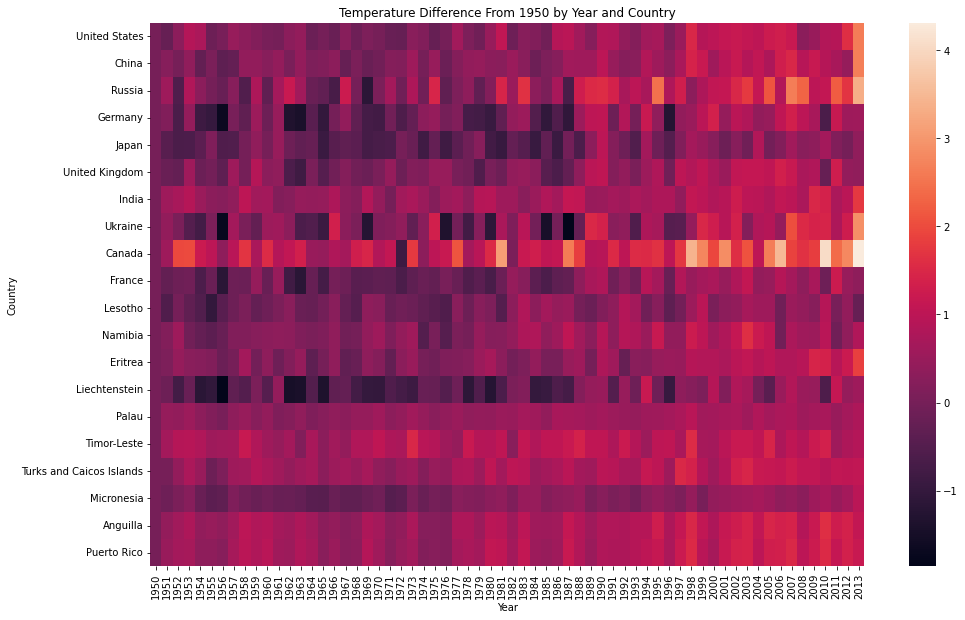

In [305]:
import seaborn as sns
X = comparison.Country
Y = comparison.Year
Z = comparison.TempDiffSince1950

fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches

data2 = pd.DataFrame({'Country': X, 'Year': Y, 'Temp Diff Since 1950': Z})
data_pivoted = data2.pivot("Country", "Year", "Temp Diff Since 1950")
data_pivoted = data_pivoted.reindex(countriesOrder.index)
ax = sns.heatmap(data_pivoted)
ax.set_title('Temperature Difference From 1950 by Year and Country')
fig1 = plt.gcf()
plt.savefig('./visualizations/heatmap_temp_difference_from_1950.png')
plt.show()



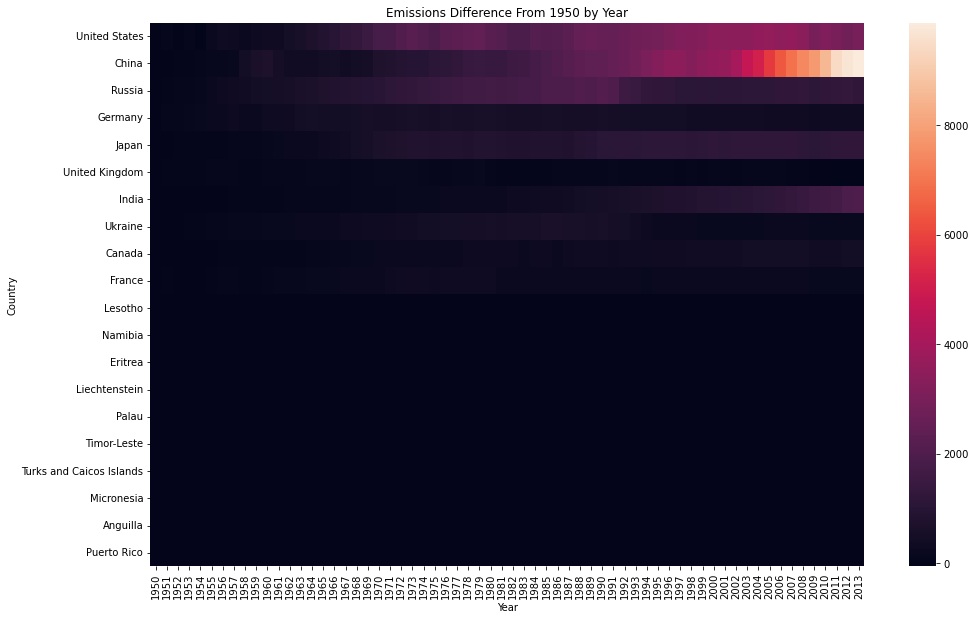

In [306]:
import seaborn as sns
X = comparison.Country
Y = comparison.Year
Z = comparison.EmissionsDiffSince1950

fig, ax = plt.subplots(figsize=(16,10))         # Sample figsize in inches

data2 = pd.DataFrame({'Country': X, 'Year': Y, 'Emissions Diff Since 1950': Z})
data_pivoted = data2.pivot("Country", "Year", "Emissions Diff Since 1950")
data_pivoted = data_pivoted.reindex(countriesOrder.index)
ax = sns.heatmap(data_pivoted)
ax.set_title('Emissions Difference From 1950 by Year')
plt.savefig('./visualizations/heatmap_emissions_difference_from_1950.png')
plt.show()


In [269]:
merged

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia
64,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe
128,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa
192,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe
256,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa
...,...,...,...,...,...,...,...,...,...,...,...
12544,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America
12608,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia
12672,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia
12736,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa


In [270]:
comparison2 = merged[merged['Country'].isin(leastEmitting_countries) | merged['Country'].isin(mostEmitting_countries) ]
comparison2.Country.nunique()
comparison2

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent
320,Anguilla,26.266417,27.363000,1.096583,0.000000,0.117248,0.117248,0.000000,8.558248,8.558248,North America
2176,Canada,-5.952917,-1.640667,4.312250,154.133752,572.613311,418.479559,11.215381,16.330663,5.115282,North America
2432,China,6.641167,9.295000,2.653833,78.835287,9956.308273,9877.472986,0.144923,7.235162,7.090239,Asia
3584,Eritrea,26.665833,28.503500,1.837667,0.000000,0.620806,0.620806,0.000000,0.188330,0.188330,Africa
4032,France,13.233250,13.584625,0.351375,202.428862,358.623337,156.194475,4.837894,5.662309,0.824415,Europe
4416,Germany,8.653417,9.235250,0.581833,510.681830,831.207653,320.525823,7.196341,10.176318,2.979977,Europe
5312,India,23.659333,25.413250,1.753917,61.102632,2037.415492,1976.312860,0.171146,1.578007,1.406861,Asia
5824,Japan,12.589500,12.964750,0.375250,102.540986,1315.568700,1213.027714,1.215617,10.303726,9.088109,Asia
6464,Lesotho,14.001250,13.773625,-0.227625,0.000000,2.333968,2.333968,0.000000,1.125379,1.125379,Africa
6656,Liechtenstein,5.435500,6.002375,0.566875,0.000000,0.192545,0.192545,0.000000,5.231345,5.231345,Europe


In [271]:
X = comparison2.Country
Y = comparison2.AvgTemp1950
Z = comparison2.AvgTemp2013

dfs = pd.DataFrame(data={'Countries': X,  
                         'Temp1950': Y, 
                         'Temp2013': Z})

dfs1 = pd.melt(dfs, id_vars = "Countries")
dfs1 = dfs1.rename(columns={"variable": "Category", "value":"Temperature"})

print(dfs1)

                   Countries  Category  Temperature
0                   Anguilla  Temp1950    26.266417
1                     Canada  Temp1950    -5.952917
2                      China  Temp1950     6.641167
3                    Eritrea  Temp1950    26.665833
4                     France  Temp1950    13.233250
5                    Germany  Temp1950     8.653417
6                      India  Temp1950    23.659333
7                      Japan  Temp1950    12.589500
8                    Lesotho  Temp1950    14.001250
9              Liechtenstein  Temp1950     5.435500
10                Micronesia  Temp1950    27.028917
11                   Namibia  Temp1950    20.434000
12                     Palau  Temp1950    27.049917
13               Puerto Rico  Temp1950    25.108333
14                    Russia  Temp1950    -5.608917
15               Timor-Leste  Temp1950    25.426667
16  Turks and Caicos Islands  Temp1950    26.359750
17                   Ukraine  Temp1950     8.020667
18          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Anguilla'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Eritrea'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Lesotho'),
  Text(9, 0, 'Liechtenstein'),
  Text(10, 0, 'Micronesia'),
  Text(11, 0, 'Namibia'),
  Text(12, 0, 'Palau'),
  Text(13, 0, 'Puerto Rico'),
  Text(14, 0, 'Russia'),
  Text(15, 0, 'Timor-Leste'),
  Text(16, 0, 'Turks and Caicos Islands'),
  Text(17, 0, 'Ukraine'),
  Text(18, 0, 'United Kingdom'),
  Text(19, 0, 'United States')])

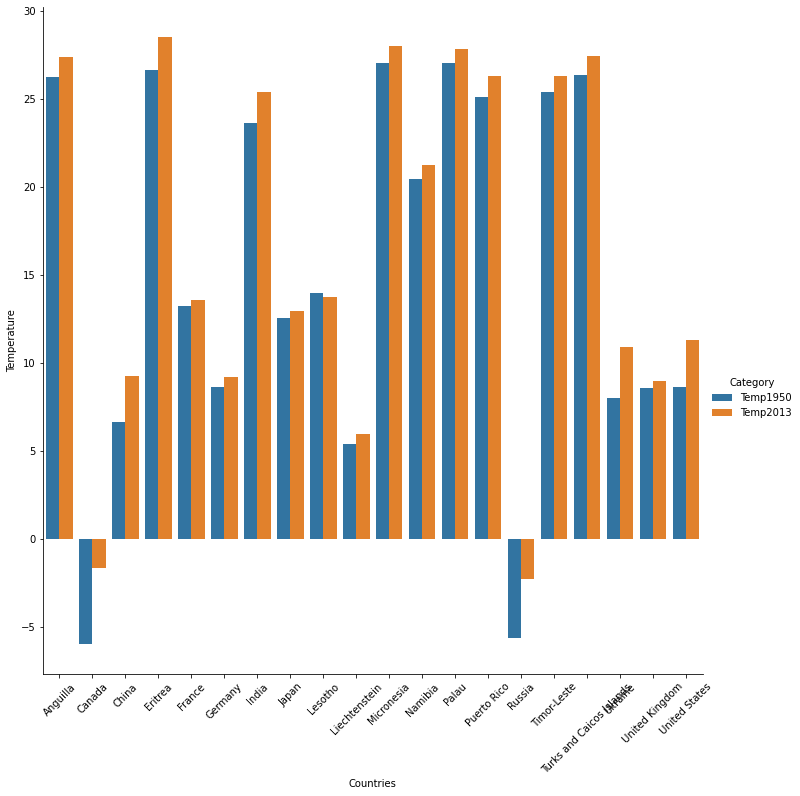

In [272]:
sns.catplot(x = 'Countries', y='Temperature', 
            hue = 'Category',data=dfs1, 
            kind='bar', height=10)

plt.xticks(rotation=45)


# Percent Change

In [273]:
merged1 = merged.copy()

In [274]:
merged1['TempPctChange'] = ((merged1['AvgTemp2013']-merged1['AvgTemp1950']).abs()/ merged1['AvgTemp1950'] * 100).round(2)
merged1['EmissionsPctChange']= ((merged1['Emissions2013']- merged1['Emissions1950']).abs()/ merged1['Emissions1950'] * 100).round(2)
merged1 = merged1.reset_index()
merged1.drop(['index'], axis=1, inplace=True)
merged1['EmissionsPctChange'].replace([np.inf, -np.inf], 0, inplace=True)
merged1['EmissionsPctChange'].fillna(0, inplace=True)
merged1['TempPctChangePOS'] = merged1['TempPctChange'].abs()
merged1['EmissionsPctChangePOS'] = merged1['EmissionsPctChange'].abs()
merged1

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia,26.76,10876.97,26.76,10876.97
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe,8.55,1681.94,8.55,1681.94
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa,10.27,3620.96,10.27,3620.96
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe,4.20,0.00,4.20,0.00
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa,4.34,13128.12,4.34,13128.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America,4.51,418.41,4.51,418.41
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia,5.38,10140.08,5.38,10140.08
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia,8.96,46229.84,8.96,46229.84
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa,1.67,89.52,1.67,89.52


In [275]:
merged1.sort_values('Emissions2013', ascending=False)

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS
38,China,6.641167,9.295000,2.653833,78.835287,9956.308273,9877.472986,0.144923,7.235162,7.090239,Asia,39.96,12529.25,39.96,12529.25
193,United States,8.656417,11.297111,2.640694,2541.485265,5480.926097,2939.440832,17.139592,17.161404,0.021812,North America,30.51,115.66,30.51,115.66
83,India,23.659333,25.413250,1.753917,61.102632,2037.415492,1976.312860,0.171146,1.578007,1.406861,Asia,7.41,3234.42,7.41,3234.42
149,Russia,-5.608917,-2.263125,3.345792,415.034248,1632.716418,1217.682170,4.045953,11.341706,7.295753,Europe,-59.65,293.39,59.65,293.39
91,Japan,12.589500,12.964750,0.375250,102.540986,1315.568700,1213.027714,1.215617,10.303726,9.088109,Asia,2.98,1182.97,2.98,1182.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kiribati,26.316167,27.551375,1.235208,0.000000,0.051296,0.051296,0.000000,0.452701,0.452701,Oceania,4.69,0.00,4.69,0.00
121,Montserrat,25.984583,27.213250,1.228667,0.000000,0.047632,0.047632,0.000000,9.507385,9.507385,North America,4.73,0.00,4.73,0.00
132,Niue,25.277250,26.047500,0.770250,0.000000,0.007328,0.007328,0.000000,4.015342,4.015342,Oceania,3.05,0.00,3.05,0.00
146,Puerto Rico,25.108333,26.283222,1.174889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,North America,4.68,0.00,4.68,0.00


In [276]:
merged.describe()

,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,18.956724,20.285557,1.328833,29.150212,168.337490,139.187278,4.094098,4.944942,0.850844
std,8.857068,8.598158,0.962968,188.764845,826.943058,749.334809,35.300992,5.924149,34.476992
min,-18.126750,-15.409750,-0.658875,0.000000,0.000000,-23.180835,0.000000,0.000000,-481.052243
25%,11.812000,13.584625,0.812750,0.008794,1.437240,0.916000,0.018339,0.861011,0.457387
50%,22.967917,24.285875,1.152125,0.351744,8.492241,7.345725,0.265062,3.062332,1.780289
75%,25.919833,27.086625,1.725750,5.618258,61.798980,45.275272,1.555362,7.032139,4.681822
max,28.355917,30.744750,5.162083,2541.485265,9956.308273,9877.472986,500.005475,41.262349,28.179251


# Percentiles

In [277]:
from scipy import stats

In [278]:
print(merged.AvgTemp1950.quantile(0.9))
print(merged.AvgTemp1950.quantile(0.75))
print(merged.AvgTemp1950.quantile(0.5))
print(merged.AvgTemp1950.quantile(0.25))
print(merged.AvgTemp1950.quantile(0.1))

26.655
25.919833333333333
22.967916666666667
11.812
7.03575


In [279]:
merged1['AvgTemp1950'].describe(percentiles=[0.1, 0.2, 0.3, 0.5, 0.75, 0.9])

count    201.000000
mean      18.956724
std        8.857068
min      -18.126750
10%        7.035750
20%       10.637917
30%       14.001250
50%       22.967917
75%       25.919833
90%       26.655000
max       28.355917
Name: AvgTemp1950, dtype: float64

In [280]:
merged1['AvgTemp1950_quantiles'] = pd.qcut(merged1.AvgTemp1950, np.linspace(0,1,11), labels=np.linspace(0.1,1,10))

In [281]:
merged1['AvgTemp2013_quantiles'] = pd.qcut(merged1.AvgTemp2013, np.linspace(0,1,11), labels=np.linspace(0.1,1,10))

In [282]:
#first rank method: https://medium.datadriveninvestor.com/valueerror-bin-edges-must-be-unique-71512ff2257d
merged1['Emissions1950_quantiles'] = merged1['Emissions1950'].transform(lambda x: pd.qcut(x.rank(method='first'), np.linspace(0,1,11), labels=np.linspace(0.1,1,10)))

In [283]:
merged1['Emissions2013_quantiles'] = pd.qcut(merged1.Emissions2013, np.linspace(0,1,11), labels=np.linspace(0.1,1,10), duplicates='drop')

In [284]:
merged1

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,Continent,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,Asia,26.76,10876.97,26.76,10876.97,0.3,0.4,0.4,0.6
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,Europe,8.55,1681.94,8.55,1681.94,0.3,0.3,0.5,0.5
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,Africa,10.27,3620.96,10.27,3620.96,0.5,0.6,0.8,0.9
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,Europe,4.20,0.00,4.20,0.00,0.3,0.3,0.1,0.2
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,Africa,4.34,13128.12,4.34,13128.12,0.5,0.5,0.5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,South America,4.51,418.41,4.51,418.41,0.7,0.7,1.0,0.9
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,Asia,5.38,10140.08,5.38,10140.08,0.6,0.6,0.6,0.9
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,Asia,8.96,46229.84,8.96,46229.84,0.8,1.0,0.4,0.7
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,Africa,1.67,89.52,1.67,89.52,0.5,0.4,0.7,0.4


In [285]:
merged1['AvgTemp1950_quantiles'] = merged1['AvgTemp1950_quantiles'].astype(float)
merged1['AvgTemp2013_quantiles'] = merged1['AvgTemp2013_quantiles'].astype(float)
merged1['Emissions1950_quantiles'] = merged1['Emissions1950_quantiles'].astype(float)
merged1['Emissions2013_quantiles'] = merged1['Emissions2013_quantiles'].astype(float)

In [286]:
merged1['TempQuantileDiff'] = merged1['AvgTemp2013_quantiles']-merged1['AvgTemp1950_quantiles']

In [287]:
merged1['EmissionsQuantileDiff'] = merged1['Emissions2013_quantiles']- merged1['Emissions1950_quantiles']

In [288]:
merged1

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
0,Afghanistan,13.043500,16.533625,3.490125,0.084272,9.250510,9.166238,0.011266,0.293283,0.282017,...,26.76,10876.97,26.76,10876.97,0.3,0.4,0.4,0.6,0.1,0.2
1,Albania,13.812833,14.993875,1.181042,0.296725,5.287466,4.990741,0.236891,1.831465,1.594574,...,8.55,1681.94,8.55,1681.94,0.3,0.3,0.5,0.5,0.0,0.0
2,Algeria,22.781833,25.121500,2.339667,3.783605,140.786376,137.002771,0.419475,3.704844,3.285369,...,10.27,3620.96,10.27,3620.96,0.5,0.6,0.8,0.9,0.1,0.1
3,Andorra,11.812000,12.307875,0.495875,0.000000,0.476320,0.476320,0.000000,6.674233,6.674233,...,4.20,0.00,4.20,0.00,0.3,0.3,0.1,0.2,0.0,0.1
4,Angola,21.571833,22.507875,0.936042,0.186864,24.718593,24.531729,0.041728,0.945370,0.903642,...,4.34,13128.12,4.34,13128.12,0.5,0.5,0.5,0.7,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,24.793500,25.912875,1.119375,38.275787,198.427035,160.151248,6.973671,6.650141,-0.323530,...,4.51,418.41,4.51,418.41,0.7,0.7,1.0,0.9,0.0,-0.1
197,Vietnam,23.944833,25.232125,1.287292,1.479660,151.518339,150.038679,0.058929,1.678544,1.619615,...,5.38,10140.08,5.38,10140.08,0.6,0.6,0.6,0.9,0.0,0.3
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,...,8.96,46229.84,8.96,46229.84,0.8,1.0,0.4,0.7,0.2,0.3
199,Zambia,20.847667,21.196000,0.348333,2.330187,4.416159,2.085972,1.005063,0.289870,-0.715193,...,1.67,89.52,1.67,89.52,0.5,0.4,0.7,0.4,-0.1,-0.3


In [289]:
merged1.describe()

,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,2.010000e+02
mean,18.956724,20.285557,1.328833,29.150212,168.337490,139.187278,4.094098,4.944942,0.850844,7.649851,3530.794726,13.645871,3530.794726,0.547761,0.547761,0.547761,0.547761,-1.380874e-19,-2.761749e-18
std,8.857068,8.598158,0.962968,188.764845,826.943058,749.334809,35.300992,5.924149,34.476992,37.362533,8287.271557,35.603803,8287.271557,0.288977,0.288977,0.288977,0.288977,5.477226e-02,1.682260e-01
min,-18.126750,-15.409750,-0.658875,0.000000,0.000000,-23.180835,0.000000,0.000000,-481.052243,-440.370000,0.000000,0.030000,0.000000,0.100000,0.100000,0.100000,0.100000,-1.000000e-01,-4.000000e-01
25%,11.812000,13.584625,0.812750,0.008794,1.437240,0.916000,0.018339,0.861011,0.457387,3.580000,62.760000,3.790000,62.760000,0.300000,0.300000,0.300000,0.300000,0.000000e+00,-1.000000e-01
50%,22.967917,24.285875,1.152125,0.351744,8.492241,7.345725,0.265062,3.062332,1.780289,4.670000,651.470000,4.760000,651.470000,0.500000,0.500000,0.500000,0.500000,0.000000e+00,0.000000e+00
75%,25.919833,27.086625,1.725750,5.618258,61.798980,45.275272,1.555362,7.032139,4.681822,9.340000,3032.100000,10.040000,3032.100000,0.800000,0.800000,0.800000,0.800000,0.000000e+00,1.000000e-01
max,28.355917,30.744750,5.162083,2541.485265,9956.308273,9877.472986,500.005475,41.262349,28.179251,138.600000,74464.940000,440.370000,74464.940000,1.000000,1.000000,1.000000,1.000000,2.000000e-01,6.000000e-01


In [290]:
merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False).head(30)

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
38,China,6.641167,9.295000,2.653833,78.835287,9956.308273,9877.472986,0.144923,7.235162,7.090239,...,39.96,12529.25,39.96,12529.25,0.1,0.2,1.0,1.0,0.1,0.0
193,United States,8.656417,11.297111,2.640694,2541.485265,5480.926097,2939.440832,17.139592,17.161404,0.021812,...,30.51,115.66,30.51,115.66,0.2,0.2,1.0,1.0,0.0,0.0
83,India,23.659333,25.413250,1.753917,61.102632,2037.415492,1976.312860,0.171146,1.578007,1.406861,...,7.41,3234.42,7.41,3234.42,0.6,0.6,1.0,1.0,0.0,0.0
149,Russia,-5.608917,-2.263125,3.345792,415.034248,1632.716418,1217.682170,4.045953,11.341706,7.295753,...,-59.65,293.39,59.65,293.39,0.1,0.1,1.0,1.0,0.0,0.0
91,Japan,12.589500,12.964750,0.375250,102.540986,1315.568700,1213.027714,1.215617,10.303726,9.088109,...,2.98,1182.97,2.98,1182.97,0.3,0.3,1.0,1.0,0.0,0.0
69,Germany,8.653417,9.235250,0.581833,510.681830,831.207653,320.525823,7.196341,10.176318,2.979977,...,6.72,62.76,6.72,62.76,0.2,0.2,1.0,1.0,0.0,0.0
170,South Korea,12.339667,13.760500,1.420833,2.183685,634.580703,632.397018,0.108619,12.666729,12.558110,...,11.51,28960.08,11.51,28960.08,0.3,0.3,0.7,1.0,0.0,0.3
85,Iran,16.908833,20.541000,3.632167,84.117845,597.952352,513.834507,4.997248,7.621215,2.623967,...,21.48,610.85,21.48,610.85,0.4,0.4,1.0,1.0,0.0,0.0
34,Canada,-5.952917,-1.640667,4.312250,154.133752,572.613311,418.479559,11.215381,16.330663,5.115282,...,-72.44,271.50,72.44,271.50,0.1,0.1,1.0,1.0,0.0,0.0
158,Saudi Arabia,25.359167,27.740750,2.381583,5.140592,544.563559,539.422967,1.663787,17.297343,15.633556,...,9.39,10493.40,9.39,10493.40,0.7,0.9,0.8,1.0,0.2,0.2


In [291]:

#Countries with Highest Temperatures 2013
print('Average Change in Avg Temperatures of 30 Countries with Highest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False)['AvgTempDiff'].head(30).mean())
a=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False)['AvgTempDiff'].head(30).mean()

print('Average Percent Change in Avg Temperatures of 30 Countries with Highest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)['TempPctChange'].head(30).mean())
b=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)['TempPctChange'].head(30).mean()

print('Average Change in Emissions of 30 Countries with Highest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)['EmissionsDiff'].head(30).mean())
c=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)['EmissionsDiff'].head(30).mean()

print('Average Percent Change in Emissions of 30 Countries with Highest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)['EmissionsPctChange'].head(30).mean())
d = merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)['EmissionsPctChange'].head(30).mean()


data =[["Highest Temps", a, b,c,d]]
HighTemps = pd.DataFrame(data,columns=['Dataset','Avg Change in Temp','Pct Change in Temp','Avg Change in Emissions', 'Pct Change in Emissions'])

#Countries with Lowest Temperatures 2013

print('Average Change in Avg Temperatures of 30 Countries with Lowest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True)['AvgTempDiff'].head(30).mean())
e=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True)['AvgTempDiff'].head(30).mean()

print('Average Percent Change in Avg Temperatures of 30 Countries with Lowest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True).head(30)['TempPctChange'].head(30).mean())
f=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True).head(30)['TempPctChange'].head(30).mean()

print('Average Change in Emissions of 30 Countries with Lowest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True).head(30)['EmissionsDiff'].head(30).mean())
g=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True).head(30)['EmissionsDiff'].head(30).mean()

print('Average Percent Change in Emissions of 30 Countries with Lowest Temperatures in 2013:',merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True).head(30)['EmissionsPctChange'].head(30).mean())
h=merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=True).head(30)['EmissionsPctChange'].head(30).mean()


data =[["Lowest Temps", e, f, g,h]]
LowTemps = pd.DataFrame(data,columns=['Dataset','Avg Change in Temp','Pct Change in Temp','Avg Change in Emissions', 'Pct Change in Emissions'])


#Countries with Highest Emissions 2013
print('Average Change in Avg Temperatures of 30 Countries with Highest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False)['AvgTempDiff'].head(30).mean())
i=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False)['AvgTempDiff'].head(30).mean()

print('Average Percent Change in Avg Temperatures of 30 Countries with Highest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False).head(30)['TempPctChange'].head(30).mean())
j=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False).head(30)['TempPctChange'].head(30).mean()

print('Average Change in Emissions of 30 Countries with Highest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False)['EmissionsDiff'].head(30).mean())
k=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False)['EmissionsDiff'].head(30).mean()

print('Average Percent Change in Emissions of 30 Countries with Highest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False).head(30)['EmissionsPctChange'].head(30).mean())
l=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=False).head(30)['EmissionsPctChange'].head(30).mean()


data =[["Highest Emissions", i, j, k, l]]
HighEmissions = pd.DataFrame(data,columns=['Dataset','Avg Change in Temp','Pct Change in Temp','Avg Change in Emissions', 'Pct Change in Emissions'])

#Countries with Lowest Emissions in 2013
print('Average Change in Avg Temperatures of 30 Countries with Lowest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True)['AvgTempDiff'].head(30).mean())
m=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True)['AvgTempDiff'].head(30).mean()

print('Average Percent Change in Temperatures of 30 Countries with Lowest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True).head(30)['TempPctChange'].head(30).mean())
n=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True).head(30)['TempPctChange'].head(30).mean()

print('Average Change in Emissions of 30 Countries with Lowest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True).head(30)['EmissionsDiff'].head(30).mean())
o=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True).head(30)['EmissionsDiff'].head(30).mean()

print('Average Percent Change in Emissions of 30 Countries with Lowest Emissions in 2013:',merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True).head(30)['EmissionsPctChange'].head(30).mean())
p=merged1.sort_values(['Emissions2013_quantiles', 'Emissions2013'],ascending=True).head(30)['EmissionsPctChange'].head(30).mean()


data =[["Lowest Emissions", m, n, o, p]]
LowEmissions = pd.DataFrame(data,columns=['Dataset','Avg Change in Temp','Pct Change in Temp','Avg Change in Emissions', 'Pct Change in Emissions'])


Average Change in Avg Temperatures of 30 Countries with Highest Temperatures in 2013: 1.6158750000000002
Average Percent Change in Avg Temperatures of 30 Countries with Highest Temperatures in 2013: 6.0393333333333326
Average Change in Emissions of 30 Countries with Highest Temperatures in 2013: 47.73823496666667
Average Percent Change in Emissions of 30 Countries with Highest Temperatures in 2013: 4959.373333333333
Average Change in Avg Temperatures of 30 Countries with Lowest Temperatures in 2013: 1.7805620370370367
Average Percent Change in Avg Temperatures of 30 Countries with Lowest Temperatures in 2013: 10.921333333333333
Average Change in Emissions of 30 Countries with Lowest Temperatures in 2013: 427.50952433333333
Average Percent Change in Emissions of 30 Countries with Lowest Temperatures in 2013: 1293.9289999999999
Average Change in Avg Temperatures of 30 Countries with Highest Emissions in 2013: 1.6649166666666668
Average Percent Change in Avg Temperatures of 30 Countries w

In [292]:
frame1=[HighTemps, LowTemps, HighEmissions, LowEmissions]
frame1 = pd.concat(frame1)
frame1.set_index('Dataset', inplace=True)
frame1


,Avg Change in Temp,Pct Change in Temp,Avg Change in Emissions,Pct Change in Emissions
Dataset,,,,
Highest Temps,1.615875,6.039333,47.738235,4959.373333
Lowest Temps,1.780562,10.921333,427.509524,1293.929000
Highest Emissions,1.664917,8.573667,828.851023,4117.902333
Lowest Emissions,1.080692,6.164667,0.197855,991.009333


In [293]:
frame1.corr()

,Avg Change in Temp,Pct Change in Temp,Avg Change in Emissions,Pct Change in Emissions
Avg Change in Temp,1.000000,0.679906,0.599335,0.428753
Pct Change in Temp,0.679906,1.000000,0.645472,-0.328383
Avg Change in Emissions,0.599335,0.645472,1.000000,0.215818
Pct Change in Emissions,0.428753,-0.328383,0.215818,1.000000


In [294]:
merged1.sort_values(['AvgTemp2013_quantiles', 'AvgTemp2013'],ascending=False).head(30)

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
49,Djibouti,28.355917,30.744750,2.388833,0.010992,0.556690,0.545698,0.176340,0.572872,0.396532,...,8.42,4964.50,8.42,4964.50,1.0,1.0,0.3,0.2,0.0,-0.1
110,Mali,27.895500,29.942000,2.046500,0.000000,2.743394,2.743394,0.000000,0.161338,0.161338,...,7.34,0.00,7.34,0.00,1.0,1.0,0.2,0.4,0.0,0.2
29,Burkina Faso,27.771750,29.385500,1.613750,0.000000,2.863840,2.863840,0.000000,0.162382,0.162382,...,5.81,0.00,5.81,0.00,1.0,1.0,0.1,0.4,0.0,0.3
191,United Arab Emirates,27.130500,29.370625,2.240125,0.000000,205.757979,205.757979,0.000000,23.510235,23.510235,...,8.26,0.00,8.26,0.00,1.0,1.0,0.3,0.9,0.0,0.6
159,Senegal,27.817083,29.301500,1.484417,0.000000,7.852669,7.852669,0.000000,0.577590,0.577590,...,5.34,0.00,5.34,0.00,1.0,1.0,0.2,0.5,0.0,0.3
130,Niger,26.735333,29.231375,2.496042,0.000000,2.070535,2.070535,0.000000,0.111002,0.111002,...,9.34,0.00,9.34,0.00,1.0,1.0,0.2,0.3,0.0,0.1
113,Mauritania,27.309750,29.110000,1.800250,0.000000,2.168864,2.168864,0.000000,0.579452,0.579452,...,6.59,0.00,6.59,0.00,1.0,1.0,0.2,0.3,0.0,0.1
67,Gambia,27.418250,28.724375,1.306125,0.014656,0.425024,0.410368,0.047773,0.200024,0.152251,...,4.76,2800.00,4.76,2800.00,1.0,1.0,0.3,0.2,0.0,-0.1
147,Qatar,26.293000,28.573750,2.280750,0.351744,83.989552,83.637808,14.482213,41.262349,26.780136,...,8.67,23778.03,8.67,23778.03,0.9,1.0,0.5,0.8,0.1,0.3
173,Sudan,26.820167,28.572000,1.751833,0.503832,17.007850,16.504018,0.081377,0.472562,0.391185,...,6.53,3275.70,6.53,3275.70,1.0,1.0,0.6,0.6,0.0,0.0


In [295]:
merged1.describe()

,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,2.010000e+02
mean,18.956724,20.285557,1.328833,29.150212,168.337490,139.187278,4.094098,4.944942,0.850844,7.649851,3530.794726,13.645871,3530.794726,0.547761,0.547761,0.547761,0.547761,-1.380874e-19,-2.761749e-18
std,8.857068,8.598158,0.962968,188.764845,826.943058,749.334809,35.300992,5.924149,34.476992,37.362533,8287.271557,35.603803,8287.271557,0.288977,0.288977,0.288977,0.288977,5.477226e-02,1.682260e-01
min,-18.126750,-15.409750,-0.658875,0.000000,0.000000,-23.180835,0.000000,0.000000,-481.052243,-440.370000,0.000000,0.030000,0.000000,0.100000,0.100000,0.100000,0.100000,-1.000000e-01,-4.000000e-01
25%,11.812000,13.584625,0.812750,0.008794,1.437240,0.916000,0.018339,0.861011,0.457387,3.580000,62.760000,3.790000,62.760000,0.300000,0.300000,0.300000,0.300000,0.000000e+00,-1.000000e-01
50%,22.967917,24.285875,1.152125,0.351744,8.492241,7.345725,0.265062,3.062332,1.780289,4.670000,651.470000,4.760000,651.470000,0.500000,0.500000,0.500000,0.500000,0.000000e+00,0.000000e+00
75%,25.919833,27.086625,1.725750,5.618258,61.798980,45.275272,1.555362,7.032139,4.681822,9.340000,3032.100000,10.040000,3032.100000,0.800000,0.800000,0.800000,0.800000,0.000000e+00,1.000000e-01
max,28.355917,30.744750,5.162083,2541.485265,9956.308273,9877.472986,500.005475,41.262349,28.179251,138.600000,74464.940000,440.370000,74464.940000,1.000000,1.000000,1.000000,1.000000,2.000000e-01,6.000000e-01


In [296]:
greatestEmissionsChange = merged1.sort_values('EmissionsPctChangePOS', ascending=False).head(10)
greatestEmissionsChange

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
55,Equatorial Guinea,25.075750,25.590500,0.514750,0.010992,8.196178,8.185186,0.048555,6.588880,6.540325,...,2.05,74464.94,2.05,74464.94,0.7,0.6,0.3,0.5,-0.1,0.2
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,...,8.96,46229.84,8.96,46229.84,0.8,1.0,0.4,0.7,0.2,0.3
58,Eswatini,19.027250,18.958250,-0.069000,0.003664,1.399648,1.395984,0.013488,1.251564,1.238076,...,0.36,38100.00,0.36,38100.00,0.4,0.4,0.3,0.3,0.0,0.0
103,Libya,21.881250,24.314000,2.432750,0.142896,43.458379,43.315483,0.126381,7.260948,7.134567,...,11.12,30312.59,11.12,30312.59,0.5,0.6,0.4,0.7,0.1,0.3
180,Thailand,26.086917,27.864875,1.777958,0.955618,290.364514,289.408896,0.046817,4.173187,4.126370,...,6.82,30285.00,6.82,30285.00,0.8,0.9,0.6,0.9,0.1,0.3
170,South Korea,12.339667,13.760500,1.420833,2.183685,634.580703,632.397018,0.108619,12.666729,12.558110,...,11.51,28960.08,11.51,28960.08,0.3,0.3,0.7,1.0,0.0,0.3
125,Nepal,14.651250,15.951250,1.300000,0.025648,6.217840,6.192192,0.003054,0.227081,0.224027,...,8.87,24142.98,8.87,24142.98,0.4,0.4,0.3,0.5,0.0,0.2
147,Qatar,26.293000,28.573750,2.280750,0.351744,83.989552,83.637808,14.482213,41.262349,26.780136,...,8.67,23778.03,8.67,23778.03,0.9,1.0,0.5,0.8,0.1,0.3
96,Kuwait,24.617833,27.273375,2.655542,0.384720,83.723279,83.338559,2.502439,22.959788,20.457349,...,10.79,21662.13,10.79,21662.13,0.6,0.8,0.6,0.8,0.2,0.2
151,Réunion,23.069417,24.269125,1.199708,0.025648,4.362587,4.336939,0.102880,4.810492,4.707612,...,5.20,16909.46,5.20,16909.46,0.6,0.5,0.3,0.4,-0.1,0.1


In [297]:
greatestEmissionsChange

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
55,Equatorial Guinea,25.075750,25.590500,0.514750,0.010992,8.196178,8.185186,0.048555,6.588880,6.540325,...,2.05,74464.94,2.05,74464.94,0.7,0.6,0.3,0.5,-0.1,0.2
198,Yemen,25.815667,28.129750,2.314083,0.058624,27.160406,27.101782,0.012439,1.006537,0.994098,...,8.96,46229.84,8.96,46229.84,0.8,1.0,0.4,0.7,0.2,0.3
58,Eswatini,19.027250,18.958250,-0.069000,0.003664,1.399648,1.395984,0.013488,1.251564,1.238076,...,0.36,38100.00,0.36,38100.00,0.4,0.4,0.3,0.3,0.0,0.0
103,Libya,21.881250,24.314000,2.432750,0.142896,43.458379,43.315483,0.126381,7.260948,7.134567,...,11.12,30312.59,11.12,30312.59,0.5,0.6,0.4,0.7,0.1,0.3
180,Thailand,26.086917,27.864875,1.777958,0.955618,290.364514,289.408896,0.046817,4.173187,4.126370,...,6.82,30285.00,6.82,30285.00,0.8,0.9,0.6,0.9,0.1,0.3
170,South Korea,12.339667,13.760500,1.420833,2.183685,634.580703,632.397018,0.108619,12.666729,12.558110,...,11.51,28960.08,11.51,28960.08,0.3,0.3,0.7,1.0,0.0,0.3
125,Nepal,14.651250,15.951250,1.300000,0.025648,6.217840,6.192192,0.003054,0.227081,0.224027,...,8.87,24142.98,8.87,24142.98,0.4,0.4,0.3,0.5,0.0,0.2
147,Qatar,26.293000,28.573750,2.280750,0.351744,83.989552,83.637808,14.482213,41.262349,26.780136,...,8.67,23778.03,8.67,23778.03,0.9,1.0,0.5,0.8,0.1,0.3
96,Kuwait,24.617833,27.273375,2.655542,0.384720,83.723279,83.338559,2.502439,22.959788,20.457349,...,10.79,21662.13,10.79,21662.13,0.6,0.8,0.6,0.8,0.2,0.2
151,Réunion,23.069417,24.269125,1.199708,0.025648,4.362587,4.336939,0.102880,4.810492,4.707612,...,5.20,16909.46,5.20,16909.46,0.6,0.5,0.3,0.4,-0.1,0.1


In [298]:
merged1.loc[merged1['Country'] == 'China']

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
38,China,6.641167,9.295,2.653833,78.835287,9956.308273,9877.472986,0.144923,7.235162,7.090239,...,39.96,12529.25,39.96,12529.25,0.1,0.2,1.0,1.0,0.1,0.0


In [299]:
greatestTempChange = merged1.sort_values('TempPctChangePOS', ascending=False).head(10)
greatestTempChange

,Country,AvgTemp1950,AvgTemp2013,AvgTempDiff,Emissions1950,Emissions2013,EmissionsDiff,PerCapita1950,PerCapita2013,PerCapDiff,...,TempPctChange,EmissionsPctChange,TempPctChangePOS,EmissionsPctChangePOS,AvgTemp1950_quantiles,AvgTemp2013_quantiles,Emissions1950_quantiles,Emissions2013_quantiles,TempQuantileDiff,EmissionsQuantileDiff
119,Mongolia,-0.824917,2.807750,3.632667,0.285792,43.478039,43.192247,0.365809,15.281441,14.915632,...,-440.37,15113.18,440.37,15113.18,0.1,0.1,0.5,0.7,0.0,0.2
97,Kyrgyzstan,2.625000,6.263125,3.638125,3.872619,9.658305,5.785686,2.211377,1.688645,-0.522732,...,138.60,149.40,138.60,149.40,0.1,0.1,0.8,0.6,0.0,-0.2
93,Kazakhstan,4.267417,8.937250,4.669833,45.155046,251.452709,206.297663,6.784443,14.496518,7.712075,...,109.43,456.87,109.43,456.87,0.1,0.2,1.0,0.9,0.1,-0.1
178,Tajikistan,3.204250,6.562625,3.358375,2.209819,2.906893,0.697074,1.447979,0.357261,-1.090718,...,104.81,31.54,104.81,31.54,0.1,0.1,0.7,0.4,0.0,-0.3
62,Finland,2.206250,4.064125,1.857875,6.544565,51.703752,45.159187,1.632758,9.506337,7.873579,...,84.21,690.03,84.21,690.03,0.1,0.1,0.8,0.8,0.0,0.0
135,Norway,0.983750,1.735375,0.751625,8.432180,44.586000,36.153820,2.582499,8.776486,6.193987,...,76.40,428.76,76.40,428.76,0.1,0.1,0.8,0.8,0.0,0.0
34,Canada,-5.952917,-1.640667,4.312250,154.133752,572.613311,418.479559,11.215381,16.330663,5.115282,...,-72.44,271.50,72.44,271.50,0.1,0.1,1.0,1.0,0.0,0.0
154,Saint Pierre and Miquelon,4.293333,6.924444,2.631111,0.014656,0.065952,0.051296,3.276548,10.982848,7.706300,...,61.28,350.00,61.28,350.00,0.1,0.1,0.3,0.1,0.0,-0.2
149,Russia,-5.608917,-2.263125,3.345792,415.034248,1632.716418,1217.682170,4.045953,11.341706,7.295753,...,-59.65,293.39,59.65,293.39,0.1,0.1,1.0,1.0,0.0,0.0
82,Iceland,1.853500,2.920250,1.066750,0.740128,3.480080,2.739952,5.188419,10.740192,5.551773,...,57.55,370.20,57.55,370.20,0.1,0.1,0.6,0.4,0.0,-0.2


In [300]:
merged1.columns

Index(['Country', 'AvgTemp1950', 'AvgTemp2013', 'AvgTempDiff', 'Emissions1950',
       'Emissions2013', 'EmissionsDiff', 'PerCapita1950', 'PerCapita2013',
       'PerCapDiff', 'Continent', 'TempPctChange', 'EmissionsPctChange',
       'TempPctChangePOS', 'EmissionsPctChangePOS', 'AvgTemp1950_quantiles',
       'AvgTemp2013_quantiles', 'Emissions1950_quantiles',
       'Emissions2013_quantiles', 'TempQuantileDiff', 'EmissionsQuantileDiff'],
      dtype='object')

In [301]:
import plotly.express as px
import pandas as pd

# pandas data frame

fig = px.line(merged1, x = 'Year', y = 'TempPctChangePOS', color = 'Continent', symbol = 'Continent', title="Percent Change in Temperatures from 1950 Temperatures by Continent")

fig.show() 
fig.write_image('line_percent_change_temp_difference_since_1950.png')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Country', 'AvgTemp1950', 'AvgTemp2013', 'AvgTempDiff', 'Emissions1950', 'Emissions2013', 'EmissionsDiff', 'PerCapita1950', 'PerCapita2013', 'PerCapDiff', 'Continent', 'TempPctChange', 'EmissionsPctChange', 'TempPctChangePOS', 'EmissionsPctChangePOS', 'AvgTemp1950_quantiles', 'AvgTemp2013_quantiles', 'Emissions1950_quantiles', 'Emissions2013_quantiles', 'TempQuantileDiff', 'EmissionsQuantileDiff'] but received: Year

In [ ]:
print(set(greatestTempChange.Country) | set(greatestEmissionsChange.Country))

### Between these two series, "Mongolia" is the only one on both lists.

In [ ]:
merged1.loc[merged1['Country'] == 'Canada']

In [ ]:
merged1.sort_values('TempPctChangePOS', ascending=False).head(10)

In [ ]:
comparison3 = merged1[merged1['Country'].isin(leastEmitting_countries) | merged1['Country'].isin(mostEmitting_countries) ]
comparison3.Country.nunique()
comparison3

In [ ]:
X = comparison3.Country
Y = comparison3.TempPctChangePOS
Z = comparison3.EmissionsPctChange

dfs1 = pd.DataFrame(data={'Countries': X,  
                         'TempPctChangePOS': Y, 
                         'EmissionsPctChange': Z})

dfs2 = pd.melt(dfs1, id_vars = "Countries")
dfs2 = dfs2.rename(columns={"variable": "Category", "value":"PctChangePOS"})

print(dfs2)

In [ ]:
sns.catplot(x = 'Countries', y='PctChangePOS', 
            hue = 'Category',data=dfs2, 
            kind='bar', height=10)

plt.xticks(rotation=45)

In [ ]:
comparison3.corr()

In [ ]:
sns.pairplot(comparison3)

In [ ]:
fig = px.scatter(comparison3, x="AvgTemp1950", y="AvgTemp2013", color="Continent",
                 hover_name="Country", log_x=True, size_max=60)
fig.show()

In [ ]:
comparison3.columns

In [ ]:
fig = px.scatter(comparison3, x="Emissions1950", y="Emissions2013", color="Continent",
                 hover_name="Country", log_x=True, size_max=60)
fig.show()